# TSP using Genatic Algorithm


# 1. Introduction

The Traveling Salesman Problem (TSP) is a classic optimization problem in which the goal is to find the shortest possible route that visits a set of cities exactly once and returns to the starting city. The challenge lies in determining the optimal ordering of cities to minimize the total distance traveled by the salesman.


Genetic algorithms offer a powerful approach to solving combinatorial optimization problems like the TSP. Inspired by the process of natural selection and genetics, genetic algorithms iteratively evolve a population of candidate solutions using mechanisms such as selection, crossover, and mutation. By mimicking the principles of evolution, genetic algorithms can efficiently explore the solution space and converge towards high-quality solutions.

# 2. Problem Definition

In this notebook, we'll implement a genetic algorithm to tackle the TSP. We'll start by defining the problem formally: given a list of cities and their pairwise distances, the objective is to find the shortest possible route that visits each city exactly once and returns to the starting city. This problem is NP-hard, meaning that finding the optimal solution becomes increasingly challenging as the number of cities grows.

This means that our solution should be a list of cities which has the shortest path.

The goal of this notebook is to provide a clear and well-documented implementation of the genetic algorithm for solving the TSP. By following along with the notebook, readers will learn the fundamentals of genetic algorithms and how they can be applied to solve combinatorial optimization problems. Through experimentation and analysis, we'll gain insights into the behavior of the genetic algorithm and its effectiveness in finding near-optimal solutions to the TSP.

# 3. Genetic Algorithm Overview

In this section, we'll lay the groundwork for understanding the genetic algorithm implementation of the Traveling Salesman Problem (TSP). Before delving into the intricacies of the algorithm, we'll introduce key concepts that will provide readers with the necessary foundation to grasp the subsequent overview of the algorithm's workflow and its application to solving the TSP. Let's begin by familiarizing ourselves with these essential components of genetic algorithms.

3.1 Genes

As mentioned before, our solution will be a list of cities, and in this problem the dataset we have is the cities, each with its longitude and latitude. These cities are called genes, which are the building blocks of our solution. This will be much clearer in the following couble of lines when we define chromosomes. 

3.2 Chromosomes

A Chromosome is our solution, which is the list of cities. So, by extension, the chromosome is a list of genes. I hope it sounds clearer now. 

3.3 Population

Genetic algorithms (GAs) are iterative and stochastic (randomly working) optimization algorithms where we have a list of chromosomes (candidate solutions) to iterate over and develop them to 'fit' more to our problem so we can pick the best solution.
In the context of GAs, this list of chromosomes is called population. 

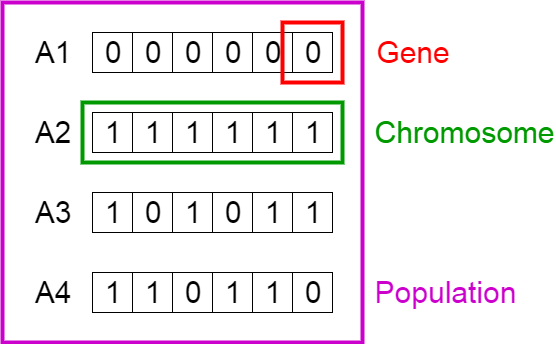

If these definitions are clear now, we can go through the operations of the algorithm.

3.4 Initialization

GAs simulate the natural world where people reproduce new generations. In the beginning of the problem where we only have our dataset, we create the first generation ourselves, we do not care if its close to the optimal solution or not, we will devlope it anyway. So, we create a random number of chromosomes, which is called population size and it is a hyperparameter.

 In the context of TSP problem, the initialized population is created by selecting cities randomly and list them together to make a chromosome .The length of each chromosome equals number of cities.

Each created chromosome should be evaluated, this evaluation is done by calculating a 'fitness score' (we will define it in the following cells) for each chromosome and this tells how good is this solution.

3.5 Selection

After initialization, we need to select 'parents' from the first generation to reproduce new solutions (new generation). Each parent create 2 childs. The selection creteria is mainly based on the fitness score. Parents could be choosen randomly from the population, or using Tournment Seletion creteria.

Tournament selection is a widely used method in genetic algorithms for selecting parents to reproduce new solutions. It operates by randomly selecting a subset of individuals (chromosomes) from the population and then choosing the best individual (parent) from this subset based on their fitness scores. This process is repeated to select the second parent.

Tournament selection offers a balance between exploration and exploitation in the search process. By randomly selecting individuals for the tournament, the algorithm maintains diversity in the selected parents, which helps explore different regions of the solution space. At the same time, choosing the best individual from the tournament ensures that fitter individuals are more likely to be selected, facilitating exploitation of promising regions.


3.6 Crossover

Reproduction of new children is done by crossover (recombination). Crossover a key genetic operator in genetic algorithms. It involves combining genetic material from two parent chromosomes to produce offspring with characteristics inherited from both parents.

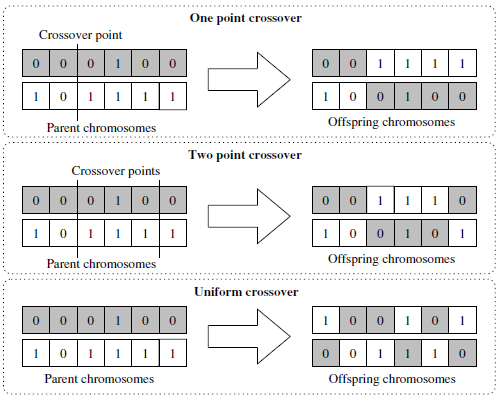

* Single Point Crossover involves randomly selecting a single crossover point along the parent chromosomes and exchanging the genetic material beyond that point to create offspring chromosomes.

* Two Point Crossover involves randomly selecting two crossover points along the parent chromosomes and exchanging the genetic material between these points to create offspring chromosomes.

*  Uniform Crossover involves swapping genes randomly between parent chromosomes to create offspring chromosomes.

If we try to perfrom any of these crossover methods on our TSP we will find that it is breaking our constrains, as in one parent we will bw visiting the same city twice and in the other one we will skip one. So we will introduce another crossover method which is Parially Mapped Crossover.

* Partially Mapped Crossover operator creates offspring chromosomes from two parent chromosomes. It involves randomly selecting two crossover points (cut points) along the parent chromosomes. The child inhitrits the genes before the lefter cut point from its parent (child 1 and parent 1), then we start swapping the genes between the cutpoints. For the first child, we start swapping the genes after the cutpoint, we swap it but we

It's important to note that not all selected parents undergo crossover to produce offspring. Another crucial hyperparameter is the crossover rate, also known as crossover probability, which determines the percentage of the total population that will engage in crossover. Once two parents are selected, a random number between 0 and 1 is generated to determine whether they will undergo crossover (if the generated number is less than the crossover rate) or not. If the parents are not undergoing crossover, they pass directly to the new generation.

3.6 Mutation                                                                                                                                                

While crossover combines genetic material from parents to exploit existing good solutions and refine offspring, mutation introduces random changes to explore new solution possibilities and maintain genetic diversity. Crossover may produce clones (duplicate chromosomes) which reduces diversity and the quality of our solutions, making mutation essential in mitigating this risk even before it arises.

In the context of the TSP problem, swap mutation is commonly employed, where random genes are exchanged within each chromosome. Similar to the crossover rate, a mutation rate is defined to govern the likelihood of mutation occurrence.

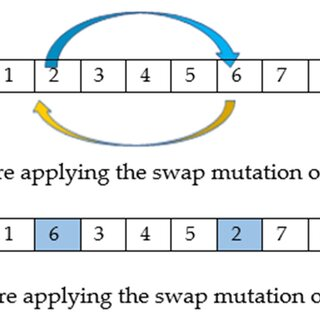

After mutation, each new offspring chromosome must undergo evaluation. In certain methodologies, this evaluation serves to determine whether to retain the offspring chromosomes or revert to the parents for the new generation. This decision is made by comparing the fitness score of each new child to that of its parent. However, if the fitness score of a child is lower than its parent's but still superior to the fitness scores of subsequent children in the generation, we must store all offspring chromosomes in what I refer to as 'a transition list'. Subsequently, we compare them and select the final list that is going to be our new generation to do the same steps again on. 

In the context of the TSP problem, we accept crossover and mutation for a pair of parents if their respective crossover and mutation probabilities are lower than the defined crossover and mutation rates. In such cases, the resulting offspring are directly incorporated into the new generation.

3.7 Elitism

Now, a pertinent question arises: what if, in a certain generation, we obtain a candidate solution with a commendable fitness score, but due to the stochastic nature of operations such as crossover and mutation, all offspring chromosomes end up having lower fitness scores? This dilemma underscores the importance of elitism.

Elitism is used to preserve the best-performing individuals (chromosomes) from one generation to the next. Typically, elitism entails the selection of a specific number or percentage of top-performing individuals from the current generation based on their fitness scores. These elite individuals are then directly preserved and copied to the next generation without undergoing any genetic operators, such as crossover or mutation.

It's worth noting that despite being preserved, elite individuals remain available for selection as parents for crossover in the current generation. This ensures that their superior genetic material continues to contribute to the evolutionary process.

3.8 Fitness Score (Evaluation)

The fitness score is calculated based on the problem-specific criteria and objectives. It typically involves evaluating the solution's performance against predefined metrics, constraints, or objectives relevant to the optimization problem. The fitness function may consider various factors such as solution feasibility, optimality, cost, distance, accuracy, or any other relevant criteria. Solutions with higher fitness scores are more likely to be selected as parents, leading to a phenomenon known as selection pressure, where the genetic algorithm favors solutions with better fitness.

In the context of the Traveling Salesman Problem (TSP), the fitness score serves as a measure of solution quality or tour efficiency. Ideally, it should reflect the total distance traveled to visit all cities exactly once and return to the starting city, with shorter distances indicating better solutions. However, genetic algorithms tend to maximize fitness scores, often favoring solutions with higher scores. To address this, we can modify the algorithm's approach to prioritize candidates with lower fitness scores. Alternatively, we can redefine the fitness score as the inverse of the total distance (cost function), where fitness score equals 1 divided by the total distance. This approach will be adopted in this notebook to guide the algorithm's optimization process.

------------------------


After completing these steps (initialization, selection, crossover, mutation, and elitism), we have successfully generated a new population for the next generation. The process is then repeated iteratively until a termination condition is met, such as reaching the maximum number of generations or satisfying convergence criteria.

# 4. Code Implementation

Now that we have a solid understanding of the genetic algorithm's workflow and its application to solving the Traveling Salesman Problem (TSP), let's move on to the code implementation. In this section, we will translate the theoretical concepts discussed earlier into Python code and demonstrate how to apply them to solve the TSP. Through hands-on coding examples, we will explore each step of the algorithm's execution and visualize the results. Let's dive into the code!

Let's define our gene:

In [1]:
import math, csv
class City:
    """
    
    Represents a city in the TSP problem.

    Attributes:
        all_cities (list): A list containing all city objects.
        name (int): The name or identifier of the city.
        x (float): The x-coordinate of the city.
        y (float): The y-coordinate of the city.
    """
    
    all_cities = []

    def __init__(self, name, x, y) -> None:
        """
        Initializes a city object with the given name and coordinates.

        Args:
            name (int): The name or identifier of the city.
            x (float): The x-coordinate of the city.
            y (float): The y-coordinate of the city.
        """
        self.name = name
        self.x = x
        self.y = y
        City.all_cities.append(self)
        
    # This function is used to create 
        
    def distance_to(self, other_city):
        """
        Computes the Euclidean distance between this city and another city.
        
        Args:
            other_city (City): The other city to compute the distance to.
        
        Returns:
            float: The Euclidean distance between the two cities.
        """
        return math.sqrt((other_city.x - self.x)**2 + (other_city.y - self.y)**2)
    
    @classmethod
    def load_cities(cls, file_name):
        """
        Loads city data from a CSV file and creates City objects.
        
        Args:
            file_name (str): The path to the CSV file containing city data.
        """
        with open(file_name, mode='r') as file:
            file = csv.reader(file)
            for i ,row in enumerate(file):
                if i == 0:
                    continue
                name, x, y = row
                City(int(name), float(x), float(y))

In [2]:
def distance_matrix():
    """
    Computes the distance matrix between all pairs of cities.
    
    Returns:
        list: A 2D list representing the distance matrix.
    """
    num_cities = len(City.all_cities)
    distance_matrix = [[0] * num_cities for _ in range(num_cities)]

    for i in range(num_cities):
        for j in range (i + 1, num_cities):
            distance_matrix[i][j] = distance_matrix[j][i] = City.all_cities[i].distance_to(City.all_cities[j])
            
    return distance_matrix
            

In [3]:
print(distance_matrix())

[]


In [4]:
import random

In [5]:
class Solution:
    """
    Represents a solution to the TSP problem.
    
    Attributes:
        chromosome (list): A list of City objects representing the order of cities in the solution.
        cost (float): The cost of the solution (total distance).
        fitness (float): The fitness value of the solution (inverse of cost).
    """
    def __init__(self) -> None:
        """
        Initializes a Solution object with a randomly generated chromosome.
        """
        self.chromosome = self.generate_chromosome()
        self.cost = self.cost_fun(self.chromosome)
        self.fitness = self.fitness_fun(self.cost)
    
    def generate_chromosome(self):
        """
        Generates a random chromosome (list of cities) for the solution.
        
        Returns:
            list: A randomly generated chromosome.
        """
        num_cities = len(distance_matrix)
        return random.sample(City.all_cities, num_cities) 
        # This returns only one chromosome (list of cities)
        # but we want to create an entire population, so we will do that in the main
    
    def cost_fun(self, chromosome):
        """
        Computes the cost (total distance) of the solution.
        
        Args:
            chromosome (list): The chromosome representing the order of cities in the solution.
        
        Returns:
            float: The cost of the solution.
        """
        total_distnce = 0
        for i in range(len(chromosome)-1):
            total_distnce += distance_matrix[(chromosome[i].name)-1][(chromosome[i+1].name)-1]
        total_distnce += distance_matrix[(chromosome[-1].name)-1][(chromosome[0].name)-1]
        return total_distnce       
    
    def fitness_fun(self, cost):
        """
        Computes the fitness value of the solution (inverse of cost).
        
        Args:
            cost (float): The cost of the solution.
        
        Returns:
            float: The fitness value of the solution.
        """
        return 1/cost

In [6]:
import copy

In [7]:
def find_city_by_name(city_list, target_name):
    for city in city_list:
        if city.name == target_name:
            return city  # Return the city object if found
    return None

In [8]:
class GenaticAlgorithm:
    """
    Implements the Genetic Algorithm for solving the TSP problem.
    
    Attributes:
        new_generation (list): A list containing the new generation of solutions.
        population_size (int): The size of the population in each generation.
        mutation_rate (float): The probability of mutation for each chromosome.
        crossover_rate (float): The probability of crossover for each pair of parents.
        num_generations (int): The number of generations to run the algorithm.
        elite_count (int): The number of elite solutions preserved in each generation.
        k_selection (int): The number of solutions selected for tournament selection.
        population (list): The current population of solutions.
    """
    new_generation = []
    def __init__(self, population_size, mutation_rate, crossover_rate, num_generations, elitism_percentage, k_selection) -> None:
        """
        Initializes the GeneticAlgorithm object with specified parameters.
        
        Args:
            population_size (int): The size of the population in each generation.
            mutation_rate (float): The probability of mutation for each chromosome.
            crossover_rate (float): The probability of crossover for each pair of parents.
            num_generations (int): The number of generations to run the algorithm.
            elitism_percentage (float): The percentage of elite solutions preserved in each generation.
            k_selection (int): The number of solutions selected for tournament selection.
        """
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_generations = num_generations
        self.elite_count = elitism_percentage * self.population_size
        self.k_selection = k_selection
        self.population = self.initialize_population()
        
        
    def initialize_population(self): 
        """
        Initializes the population by generating random chromosomes.
        
        Returns:
            list: A list containing Solution objects representing the initial population.
        """
        return [Solution() for _ in range(self.population_size)]
    
    def elitism(self, population, elite_count):
        """
        Selects the elite solutions from the population.
        
        Args:
            population (list): The population of solutions.
            elite_count (int): The number of elite solutions to select.
        
        Returns:
            list: A list containing the elite solutions.
        """
        elite = []
        sorted_chor = copy.deepcopy(sorted(population, key=lambda x:x.fitness, reverse=True))
        
        for i in range(elite_count):
            elite.append(sorted_chor[i])
        
        # GenaticAlgorithm.new_generation.append(*elite)
        return elite
            
    def tournment_selection(self):
        """
        Performs tournament selection to select a parent for crossover.
        
        Returns:
            Solution: The selected parent solution.
        """
        selected_k = [random.choice(self.population) for i in range(self.k_selection)]
        fittest = self.elitism(selected_k, 1)  
        # print(fittest)
        # this function selects one parent, but we need to select 2 parents to perform crossover
        # due to copmutaion parallelism we can create 2 lists, one for parent 1, and the other ones for chroosomes that are going to be parent2
        # Then crossover the 2 lists
        # for msln i in range len(lists de):
            # generate l random number
            # if its less that crossover rate: crossover
            # else: add both parent 1 and 2 to the new generation list
        fittest = fittest[0]
        return fittest
    
    def selection(self):
        """
        Performs selection of pairs of parents for crossover.
        
        Returns:
            list: A list of tuples containing pairs of parent solutions.
        """
        crossover_count = math.ceil((self.population_size - self.elite_count) / 2)
        # print(crossover_count)
        pairs_of_parents = [(self.tournment_selection(), self.tournment_selection()) for _ in range(crossover_count)]
        # print(len(pairs_of_parents))
        return pairs_of_parents
    
    def crossover(self, pairs_of_parents):
        """
        Performs crossover operation to produce offspring.
        
        Args:
            pairs_of_parents (list): A list of tuples containing pairs of parent solutions.
        
        Returns:
            list: A list containing the crossed-over offspring solutions.
        """
        crossed_over = []
        for parent1, parent2 in pairs_of_parents:
            offspring1, offspring2 = self.pmx(parent1, parent2)
            # print(offspring2, 'child1 returned from pmx')
            # print(offspring1, 'child2 returned from pmx')
            crossed_over.append(offspring1)
            crossed_over.append(offspring2)
            # crossed_over.append(offspring2)
        print(len(crossed_over), 'length of crossedover list to be mutated')
        
        # now we have only swapped genes, but we still need to update cost & fitness scores for this list
        for solution in crossed_over:
            solution.cost = solution.cost_fun(solution.chromosome)
            # print(solution.cost)
            solution.fitness = solution.fitness_fun(solution.cost)
            # print(solution.fitness)
            
        return crossed_over
                    
    def pmx(self, parent1, parent2):
        """
        Performs Partially-Mapped Crossover (PMX) between two parent solutions.
        
        Args:
            parent1 (Solution): The first parent solution.
            parent2 (Solution): The second parent solution.
        
        Returns:
            tuple: A tuple containing the crossed-over offspring solutions.
        """
        if random.random() < self.crossover_rate:
            print('crossover rejected')
            return parent1, parent2
        
        cutpoint1 = random.choice(range(len(City.all_cities)))
        cutpoint2 = random.choice(range(len(City.all_cities)))
        
        if cutpoint2 < cutpoint1:
            cutpoint1, cutpoint2 = cutpoint2, cutpoint1     
        print('cutpoint1', 'cutpoint2')  
        print(cutpoint1, cutpoint2)      
        i = cutpoint1 + 1
        j = cutpoint2 
                
        offspring1 = self.pmx_swapping(parent1, parent2, i, j)
        offspring2 = self.pmx_swapping(parent2, parent1, i, j)
        
        return offspring1, offspring2 
    
        # to crossover the other parent over, we should call the same function but give it parent1&parent2 inversed
        # in crossover() we have listof parents, where we call partial_mapped_crossover on each pair of them (one from list1 and one from list2)
        # then we should call the same function for the same parents but reversed arguments, the question here, havent we just
        # modified the first parent? so its gonna give wrong offspring for parent2, so, we should copy the parent that we are going 
        # to work on to another list to keep the original list of parents as it is for upcoming processs
        
        # we still need to find fitness score for parent copy
    

    def pmx_swapping(self, parent1, parent2, i, j):
        """
        Swaps gene segments between two parent solutions to produce offspring.
        
        Args:
            parent1 (Solution): The first parent solution.
            parent2 (Solution): The second parent solution.
            i (int): The starting index of the gene segment to swap.
            j (int): The ending index of the gene segment to swap.
        
        Returns:
            Solution: The offspring solution after gene swapping.
        """
        offspring = copy.deepcopy(parent1)
        
        # print(offspring.chromosome)
        # print(parent2.chromosome[i])
        while i < j:
            
            # print(i, j)
            # print('Parent1')
            # for k in range(15):
            #     print(offspring.chromosome[k].name, end='-')
                
            # print()
            # print('Parent2')
            # for k in range(15):
            #     print(parent2.chromosome[k].name, end='-')
                    
         # Find the index of parent2.chromosome[i] in parent_copy.chromosome
            city_name_to_swap = parent2.chromosome[i].name
            index_to_swap = list(offspring.chromosome).index(find_city_by_name(offspring.chromosome, city_name_to_swap))            
            offspring.chromosome[i], offspring.chromosome[index_to_swap] = offspring.chromosome[index_to_swap],  offspring.chromosome[i]
            # print()
            # print('Parent1')
            # for k in range(15):
            #     print(offspring.chromosome[k].name, end='-')
                
            # print()
            # print('Parent2')
            # for k in range(15):
            #     print(parent2.chromosome[k].name, end='-')
            # print()
            i += 1
        # print(offspring, 'offspring in pmx_swapping')   
        print('crossover is done')
           
        return offspring
        
    def mutaion(self, crossed_over):
        """
        Performs mutation operation on the crossed-over offspring solutions.
        
        Args:
            crossed_over (list): A list of crossed-over offspring solutions.
        
        Returns:
            list: A list containing the mutated offspring solutions.
        """
        
        for solution in crossed_over:
            
            if random.random() < self.mutation_rate:
                pass
                # print()
                # print('Before mutation:')
                # for k in range(15):
                #     print(solution.chromosome[k].name, end='-')
                # print()
                # print('mutation rejected')
                
            else:
            
                random_index1 = random.choice(range(len(City.all_cities)))
                random_index2 = random.choice(range(len(City.all_cities)))
                
                # print()
                # print('Before mutation:')
                # for k in range(15):
                #     print(solution.chromosome[k].name, end='-')
                
                solution.chromosome[random_index1], solution.chromosome[random_index2] = solution.chromosome[random_index2], solution.chromosome[random_index1]
                
                solution.cost = solution.cost_fun(solution.chromosome)
                solution.fitness = solution.fitness_fun(solution.cost)
                
        #         print()
        #         print('After mutation:')
        #         for k in range(15):
        #             print(solution.chromosome[k].name, end='-')
        # print()
        # print(len(crossed_over), 'len of crossed_over after mutation')   
        return crossed_over   
    
    def create_new_gen(self, elite_list, mutated_list):
        """
        Creates a new generation of solutions by combining elite solutions and mutated offspring.
        
        Args:
            elite_list (list): A list containing the elite solutions from the current generation.
            mutated_list (list): A list containing the mutated offspring solutions.
        """
        
        GenaticAlgorithm.new_generation = []
        
        # print(GenaticAlgorithm.new_generation)
        # print(len(elite_list))
        # print(len(mutated_list))
        
        GenaticAlgorithm.new_generation.extend(elite_list)

        # Calculate the remaining capacity
        remaining_capacity = 50 - len(GenaticAlgorithm.new_generation)

        # Append elements from mutated list, limited to the remaining capacity
        GenaticAlgorithm.new_generation.extend(mutated_list[:remaining_capacity])
        # print(len(GenaticAlgorithm.new_generation))
        # print(GenaticAlgorithm.new_generation)
        self.population = GenaticAlgorithm.new_generation

In [9]:
City.load_cities(r'C:\Users\El-Masria\Downloads\Data set CSV.csv')
len(City.all_cities)

15

In [10]:
# distance_matrix = distance_matrix()
print(distance_matrix)

<function distance_matrix at 0x000002250C72F3A0>


In [11]:
import numpy as np

In [12]:
distance_matrix = distance_matrix()
print(distance_matrix)


[[0, 28.873300055, 82.12952630201973, 45.79853228999801, 68.35015747765597, 52.07763037224974, 72.0787287751013, 42.02118425509025, 51.01660496180007, 54.99985149107376, 28.72962105340484, 74.40947126327858, 22.710147825297707, 72.0053444352255, 45.46281015831159], [28.873300055, 0, 54.77322541501489, 45.65896039765929, 42.02945446630199, 43.21709674460577, 43.20558156915078, 22.769634289783518, 22.831269461154925, 30.618415611434298, 40.63515089340957, 51.10681948022617, 10.390598409359272, 51.90414602531482, 20.33195751158619], [82.12952630201973, 54.77322541501489, 0, 68.27106573725065, 45.67884154332288, 54.76484963158395, 22.75820510045028, 43.25551073609003, 40.721275063692445, 28.70629548548541, 79.49407488435828, 20.412598306928, 64.53727736036282, 30.808909453273415, 51.03909542860257], [45.79853228999801, 45.65896039765929, 68.27106573725065, 0, 82.28891089934294, 14.401837905281393, 72.08048339443044, 30.51648564989095, 62.13119423103745, 42.025427983543494, 20.6351502022195

In [13]:
distance_matrix_np = np.array(distance_matrix)
distance_matrix_np.shape

(15, 15)

In [14]:
total_distnce = 0
print(len(City.all_cities))
print(distance_matrix_np.shape)

15
(15, 15)


In [15]:
population_size = 50
num_generations = 100
elitism_percentage = 0.02
crossover_rate = 0.6
mutation_rate = 0.1
k_selection = 5

tsp_gen = GenaticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, elitism_percentage, k_selection)

In [16]:
len(tsp_gen.population)

50

In [17]:
tsp_gen.population[0].fitness

0.0016467819512324146

In [18]:
elite = tsp_gen.elitism(tsp_gen.population, int(tsp_gen.elite_count))
elitesss = list(elite)[0]
# print(sorted_chr[0].fitness)
print(elitesss.cost)
elitesss.cost
for i in range(15):
    print(elitesss.chromosome[i].name)

print(*elite)
print(len(elite))

522.4396653190431
14
6
11
4
3
7
9
5
1
12
15
13
2
10
8
1


In [19]:
for i in range(50):
    print(tsp_gen.population[i].cost)

607.2449356465332
619.2120394365761
678.9204587044508
701.6233880676758
695.4245468832277
544.1546684886544
596.28673603031
650.6824502885311
610.2174022191795
673.2515595084055
587.2551613560048
587.4141555244956
570.855884694218
618.2034684928987
643.1767640243488
611.753182581891
667.9773120396101
673.6052770358458
705.8371533032997
681.5174012454185
715.7112144831889
700.9386134311565
775.9003123555794
670.3984900642524
684.036579352647
646.6061929834452
708.2518303535834
589.7952147288754
691.0167478886762
661.0152877337782
571.3338164413798
678.5926981741763
604.9197293101535
653.286991634476
636.0819215091389
650.193794493416
643.3409051169557
585.2125317662139
571.845299359562
677.7005179389778
635.6631174965091
649.8118380860153
653.2126974653177
724.4689125224231
746.3878631460858
522.4396653190431
777.1600528019526
672.636654671659
747.9830889935192
584.2306642455899


In [20]:
pairs_of_parents = tsp_gen.selection()
print(pairs_of_parents)
# for i in range(25):
#     for j in range(15):
#         print(pain_of_parents[0].chromosome[i].name, '--', end='')
#     print()    


[(<__main__.Solution object at 0x000002250C5CD5B0>, <__main__.Solution object at 0x000002251BB786D0>), (<__main__.Solution object at 0x000002251BB7AD00>, <__main__.Solution object at 0x000002251BB7DA00>), (<__main__.Solution object at 0x000002251BB7B3D0>, <__main__.Solution object at 0x000002251BB7BD90>), (<__main__.Solution object at 0x000002251BB74790>, <__main__.Solution object at 0x000002251BB7F190>), (<__main__.Solution object at 0x000002251BB7FB50>, <__main__.Solution object at 0x000002251BB80520>), (<__main__.Solution object at 0x000002251BB80FD0>, <__main__.Solution object at 0x000002251BB818E0>), (<__main__.Solution object at 0x000002251BB822E0>, <__main__.Solution object at 0x000002251BB82CA0>), (<__main__.Solution object at 0x000002251BB846A0>, <__main__.Solution object at 0x000002251BB850A0>), (<__main__.Solution object at 0x000002251BB85A60>, <__main__.Solution object at 0x000002251BB87460>), (<__main__.Solution object at 0x000002251BB87DF0>, <__main__.Solution object at 0

In [21]:
crossed_over = tsp_gen.crossover(pairs_of_parents)


crossover rejected
cutpoint1 cutpoint2
8 14
crossover is done
crossover is done
crossover rejected
crossover rejected
cutpoint1 cutpoint2
7 8
crossover is done
crossover is done
cutpoint1 cutpoint2
12 13
crossover is done
crossover is done
crossover rejected
crossover rejected
cutpoint1 cutpoint2
0 8
crossover is done
crossover is done
cutpoint1 cutpoint2
0 6
crossover is done
crossover is done
crossover rejected
crossover rejected
cutpoint1 cutpoint2
1 14
crossover is done
crossover is done
crossover rejected
crossover rejected
crossover rejected
crossover rejected
cutpoint1 cutpoint2
4 9
crossover is done
crossover is done
crossover rejected
cutpoint1 cutpoint2
9 12
crossover is done
crossover is done
cutpoint1 cutpoint2
1 3
crossover is done
crossover is done
crossover rejected
cutpoint1 cutpoint2
8 14
crossover is done
crossover is done
cutpoint1 cutpoint2
7 10
crossover is done
crossover is done
cutpoint1 cutpoint2
8 14
crossover is done
crossover is done
50 length of crossedover 

In [22]:
mutated = tsp_gen.mutaion(crossed_over)

In [23]:
print(elite)

In [24]:
tsp_gen.create_new_gen(elite, mutated)

In [9]:
City.load_cities(r'C:\Users\El-Masria\Downloads\Data set CSV.csv')
distance_matrix = distance_matrix()
population_size = 50
num_generations = 100
elitism_percentage = 0.02
crossover_rate = 0.6
mutation_rate = 0.1
k_selection = 5
best_solution_list = []
elites = []
tsp_gen = GenaticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, elitism_percentage, k_selection)
for i in range(num_generations):
    elite = tsp_gen.elitism(tsp_gen.population, int(tsp_gen.elite_count))
    pairs_of_parents =  tsp_gen.selection()
    crossed_over = tsp_gen.crossover(pairs_of_parents)
    mutated = tsp_gen.mutaion(crossed_over)
    tsp_gen.create_new_gen(elite, mutated)
    elites.append(*elite)
best_solution = tsp_gen.elitism(GenaticAlgorithm.new_generation, 1)   

    
for sol in best_solution_list:
    print(sol.cost)
        

crossover rejected
crossover rejected
cutpoint1 cutpoint2
7 13
crossover is done
crossover is done
cutpoint1 cutpoint2
1 7
crossover is done
crossover is done
crossover rejected
crossover rejected
crossover rejected
crossover rejected
crossover rejected
crossover rejected
cutpoint1 cutpoint2
8 13
crossover is done
crossover is done
cutpoint1 cutpoint2
2 14
crossover is done
crossover is done
crossover rejected
crossover rejected
cutpoint1 cutpoint2
4 13
crossover is done
crossover is done
cutpoint1 cutpoint2
0 9
crossover is done
crossover is done
crossover rejected
crossover rejected
cutpoint1 cutpoint2
8 11
crossover is done
crossover is done
crossover rejected
crossover rejected
crossover rejected
cutpoint1 cutpoint2
0 5
crossover is done
crossover is done
cutpoint1 cutpoint2
7 11
crossover is done
crossover is done
crossover rejected
50 length of crossedover list to be mutated
crossover rejected
cutpoint1 cutpoint2
0 0
crossover is done
crossover is done
crossover rejected
cutpoint

In [10]:
best_solution[0].cost

284.3810904080332

In [11]:
import matplotlib.pyplot as plt

def visualize_tsp(solution):
    cities = solution.chromosome

    # Extracting x and y coordinates of cities
    x = [city.x for city in cities]
    y = [city.y for city in cities]

    # Plotting cities
    plt.scatter(x, y, color='blue', label='Cities')

    # Plotting the path
    for i in range(len(cities) - 1):
        city1 = cities[i]
        city2 = cities[i + 1]
        plt.plot([city1.x, city2.x], [city1.y, city2.y], color='red')

    # Closing the loop
    first_city = cities[0]
    last_city = cities[-1]
    plt.plot([last_city.x, first_city.x], [last_city.y, first_city.y], color='red')

    # Marking the start city
    plt.scatter(first_city.x, first_city.y, color='green', label='Start')

    # Marking the end city
    plt.scatter(last_city.x, last_city.y, color='yellow', label='End')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('TSP Solution Visualization')
    plt.legend()
    plt.show()


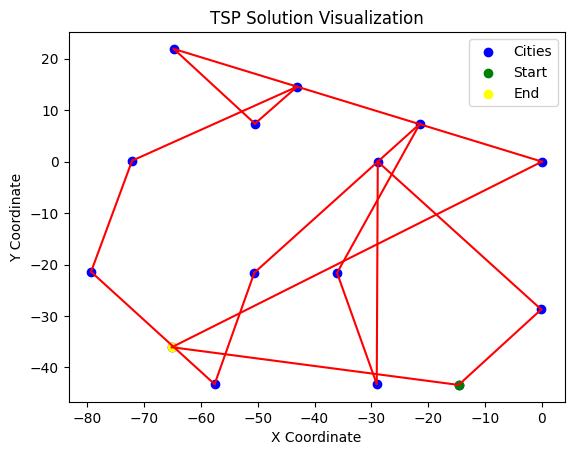

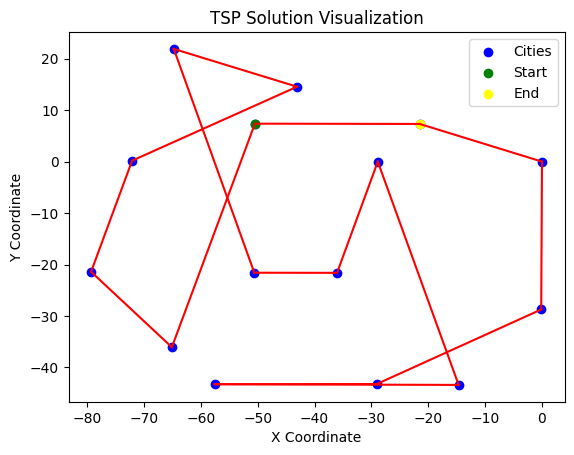

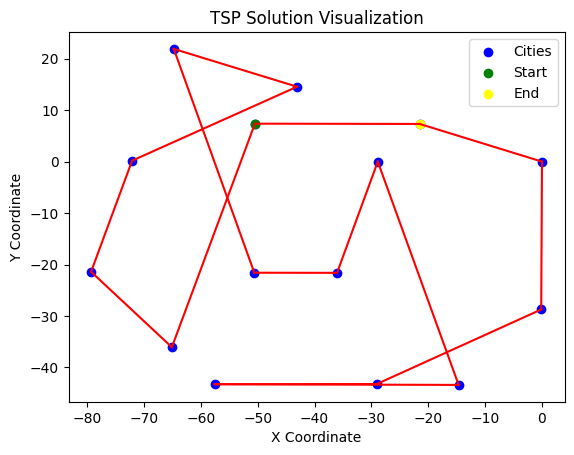

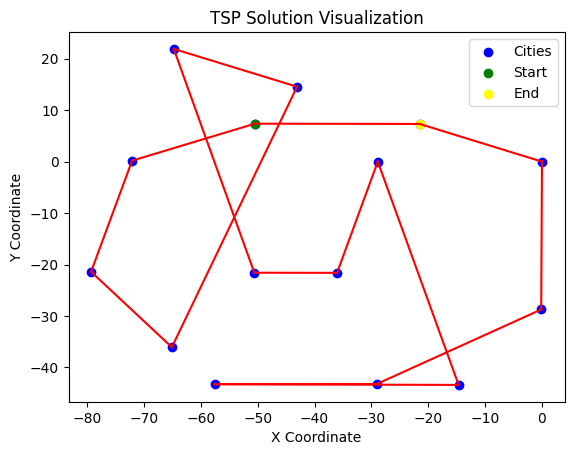

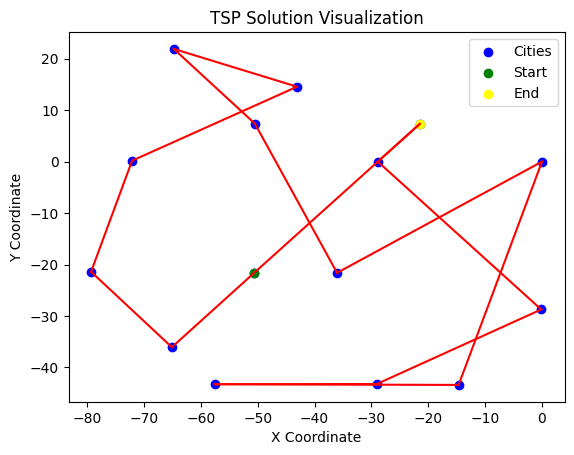

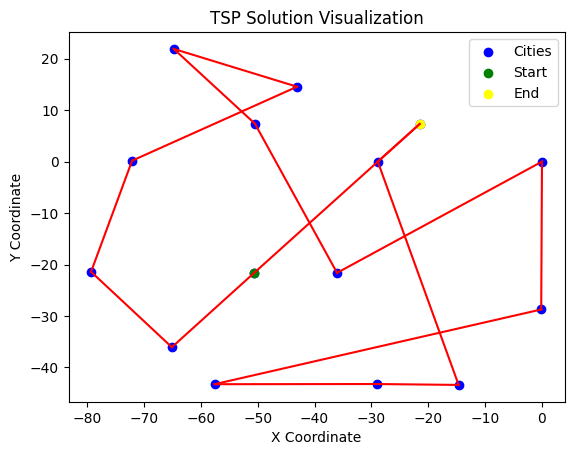

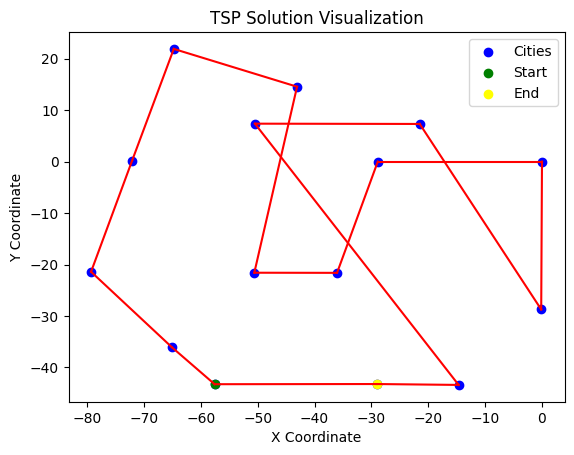

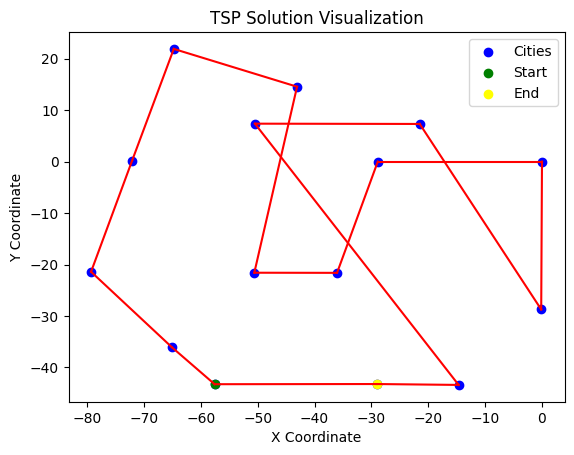

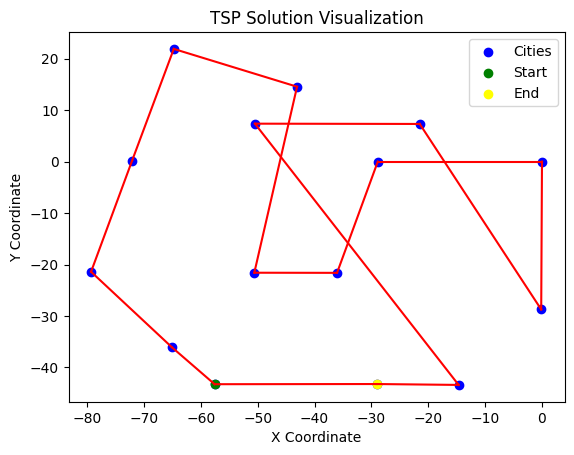

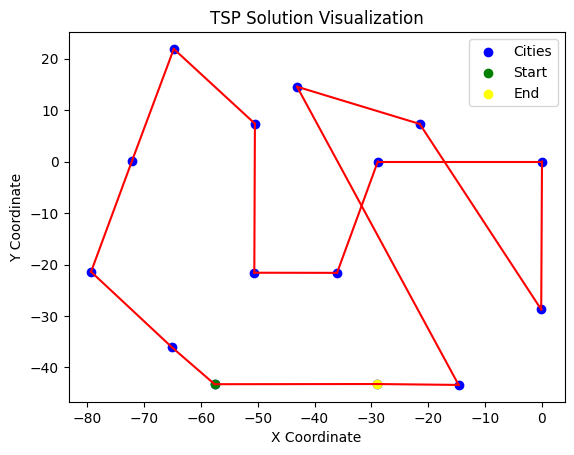

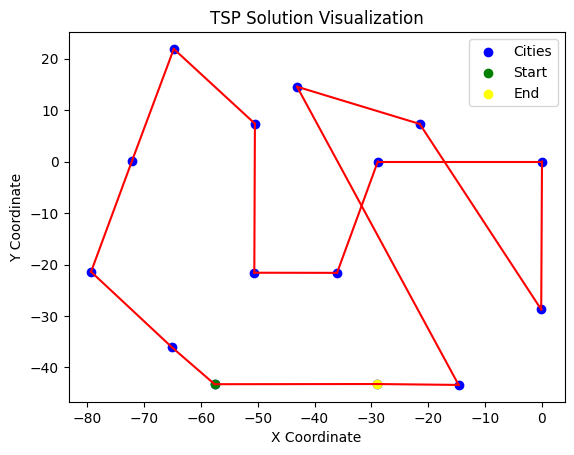

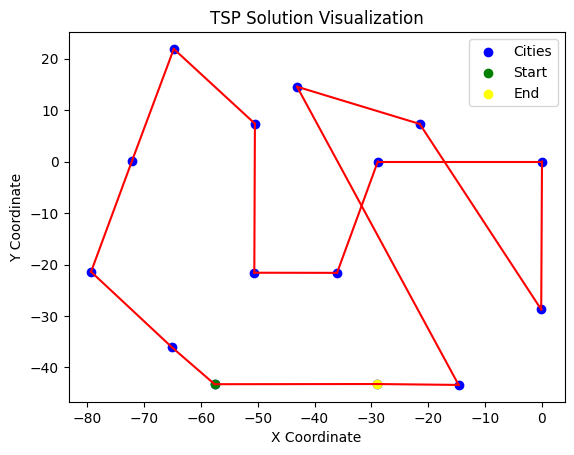

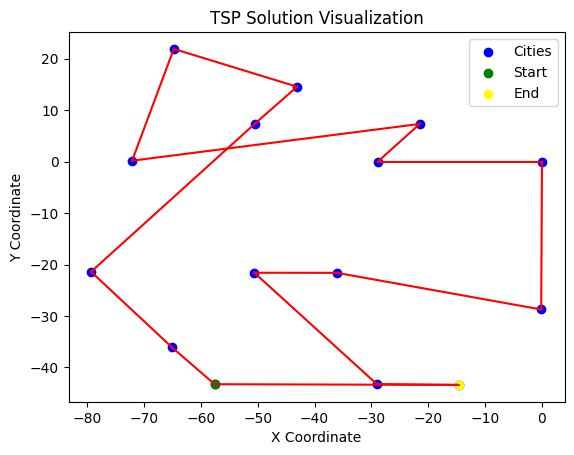

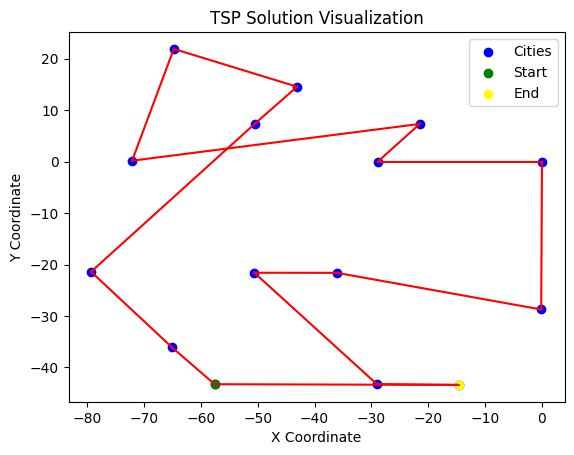

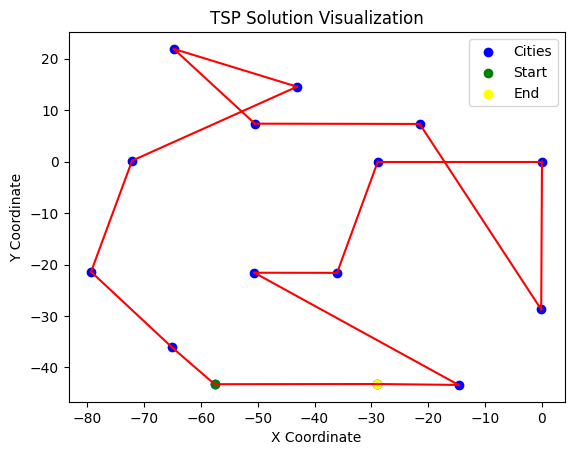

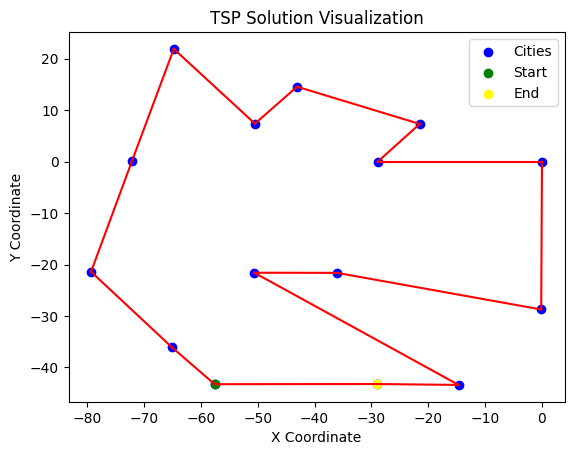

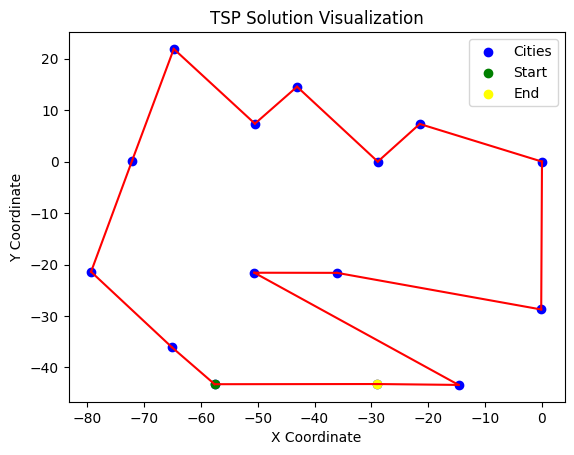

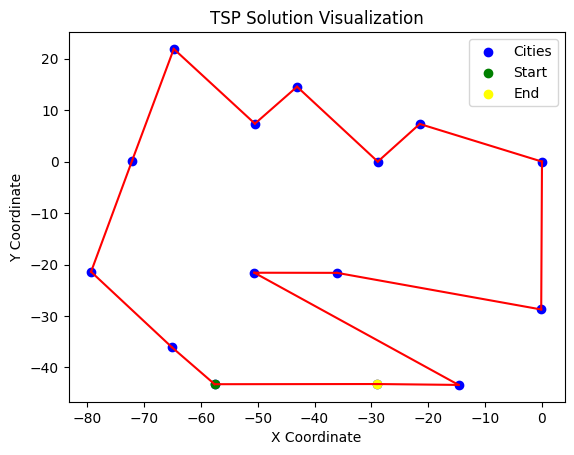

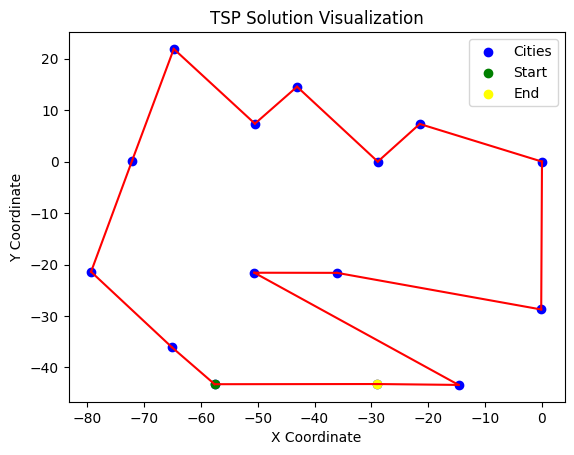

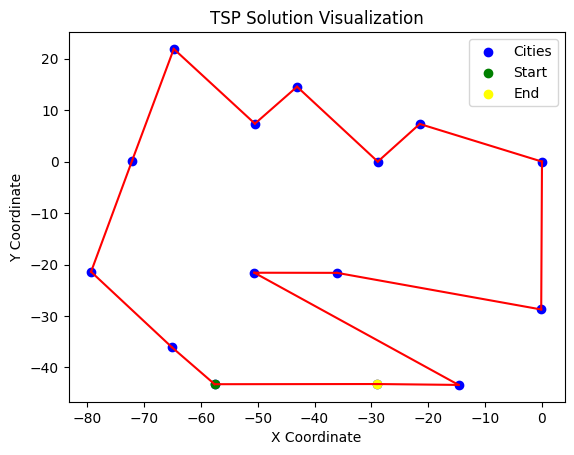

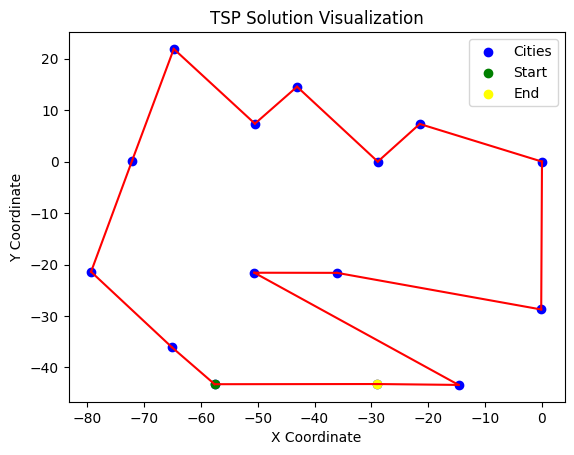

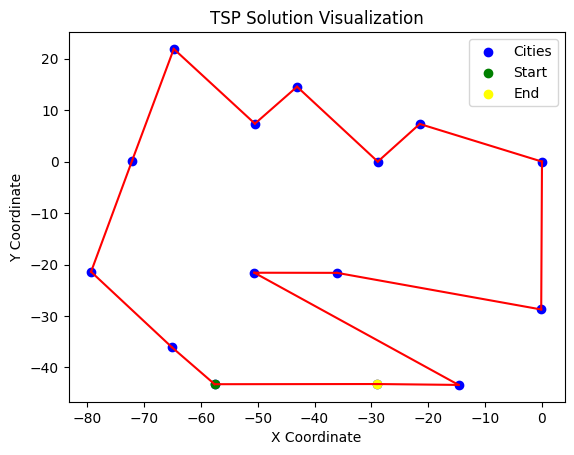

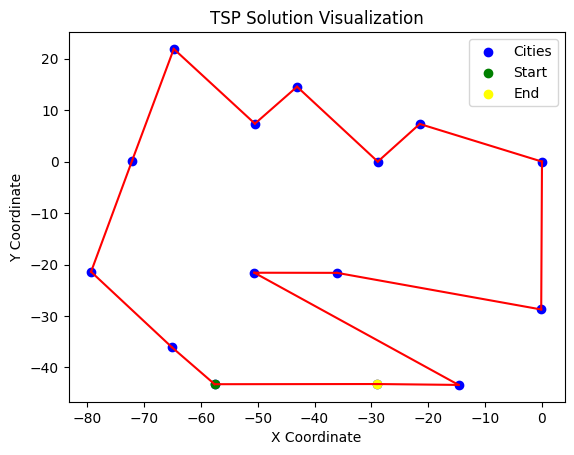

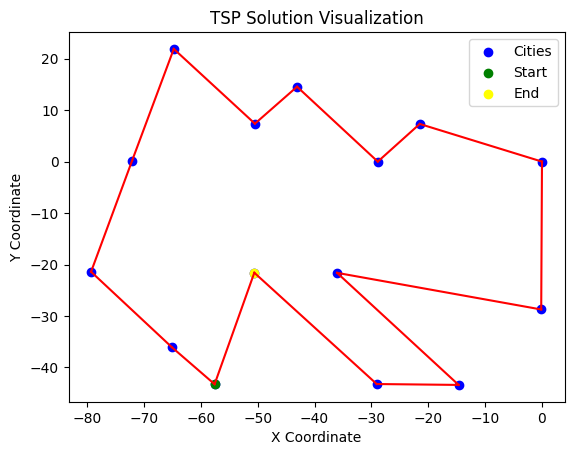

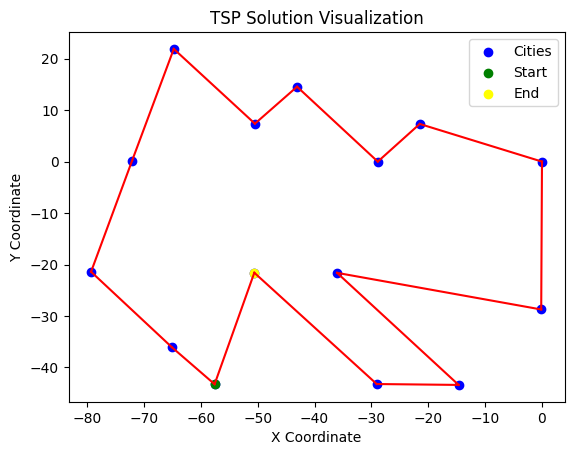

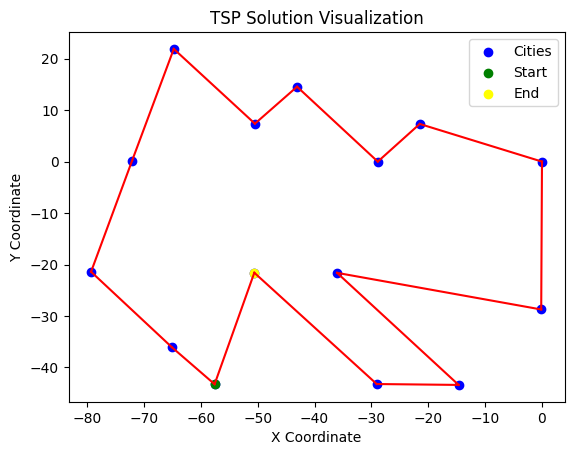

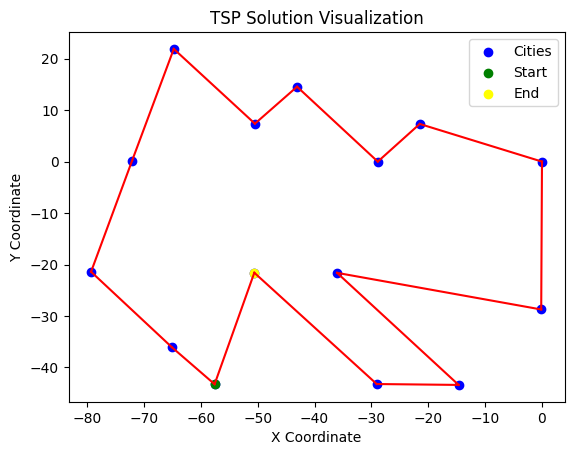

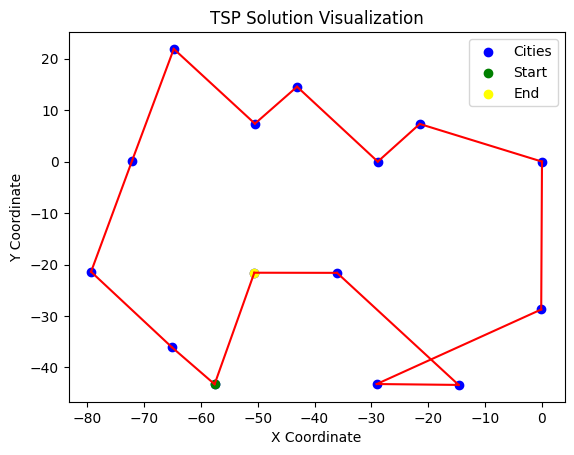

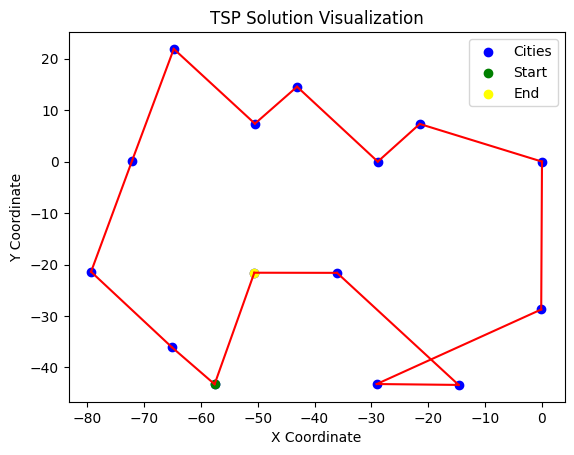

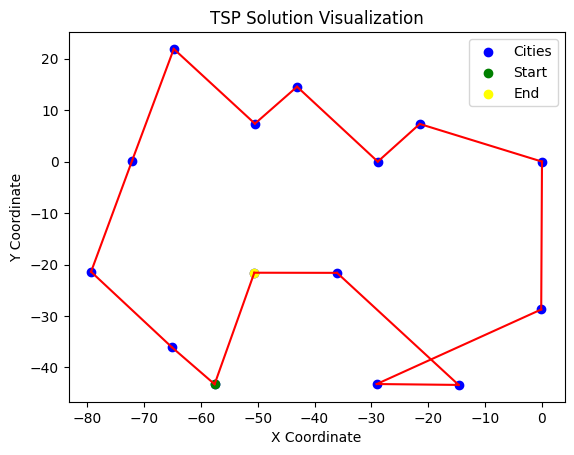

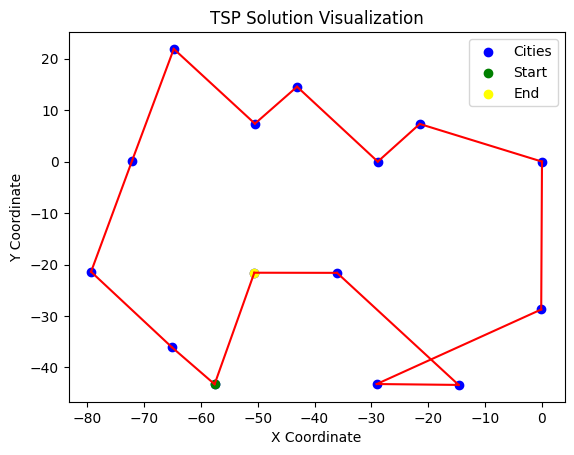

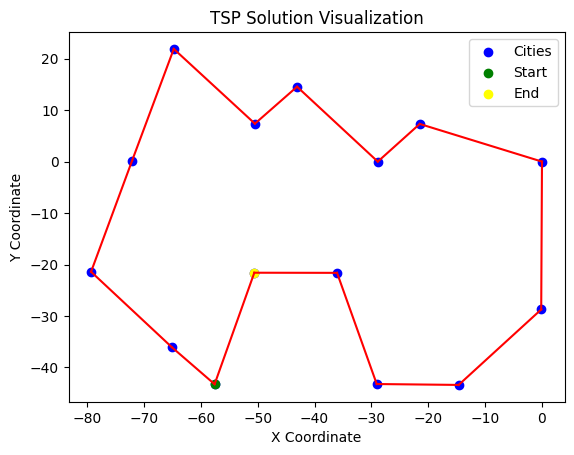

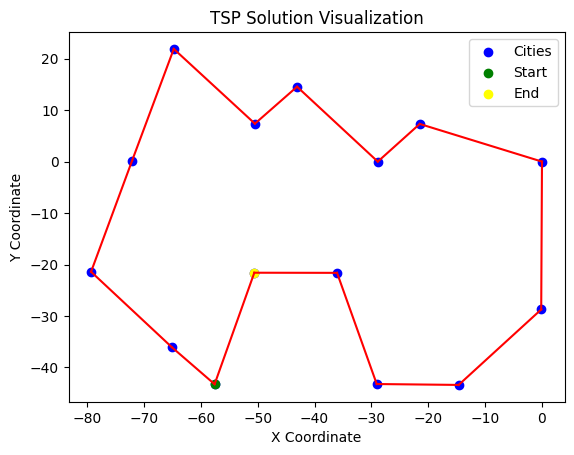

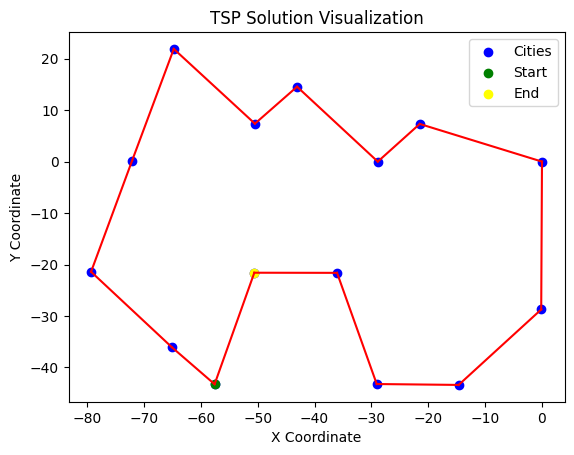

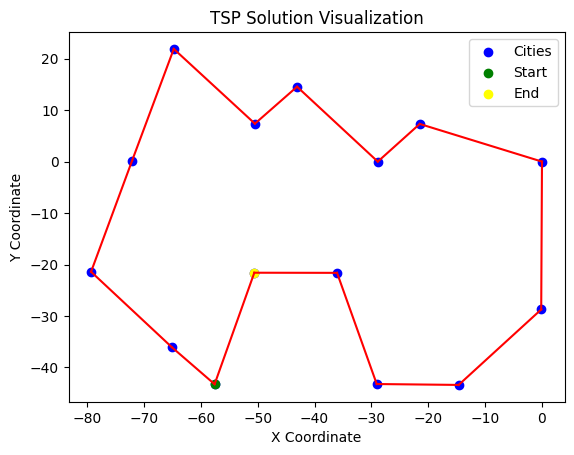

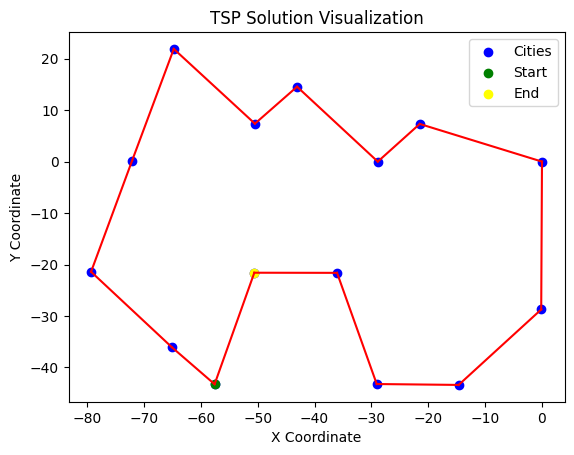

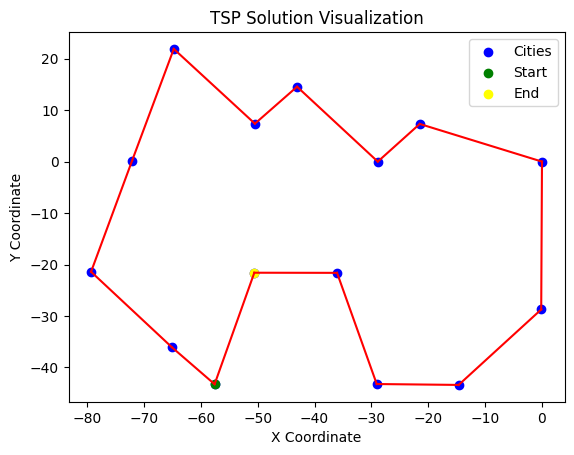

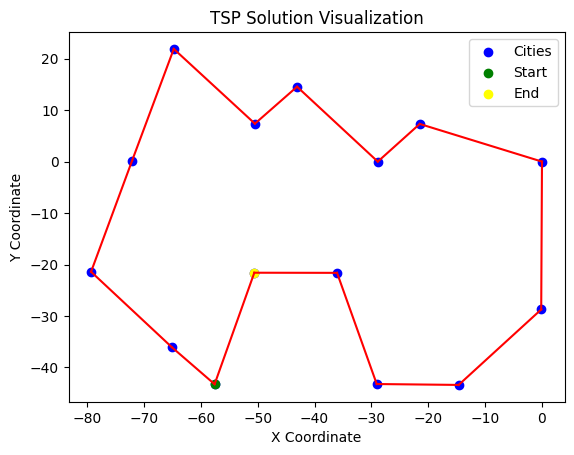

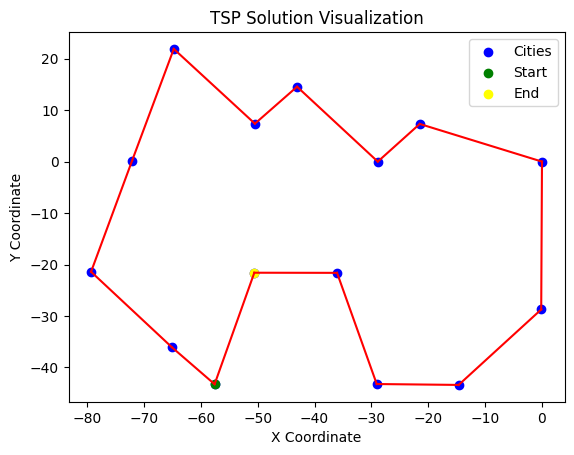

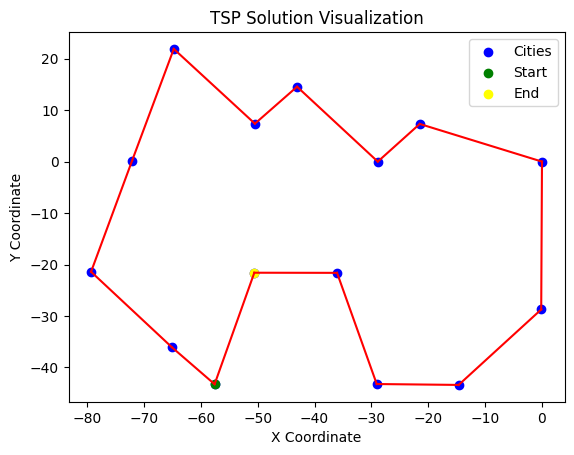

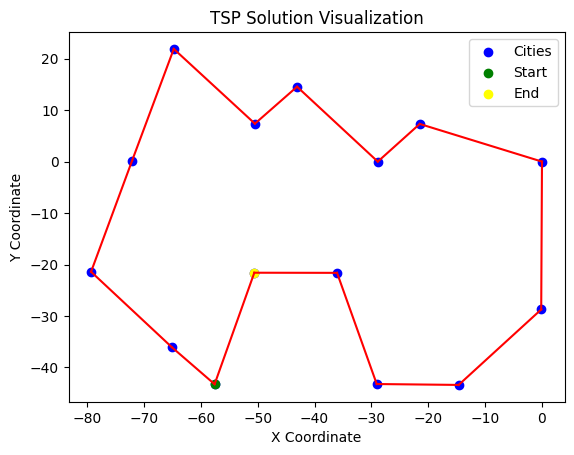

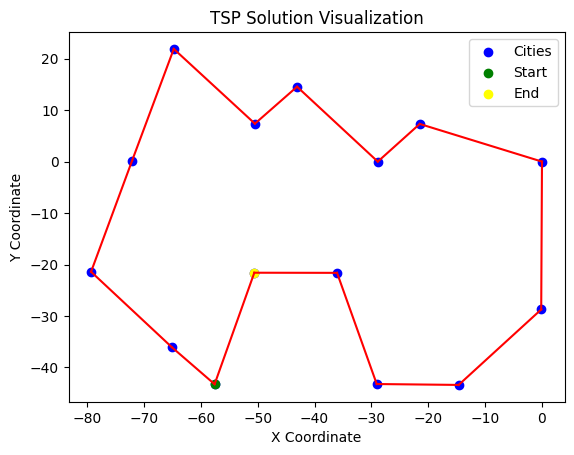

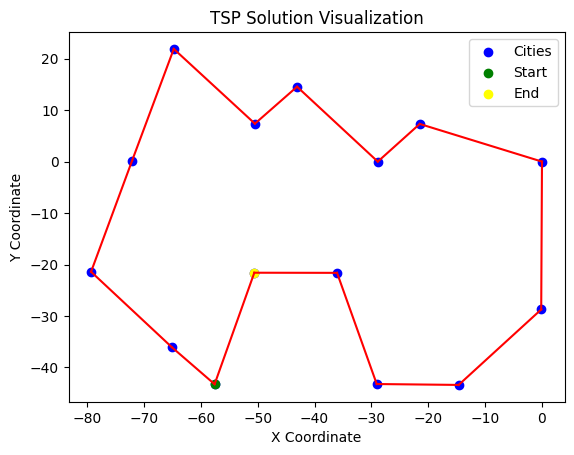

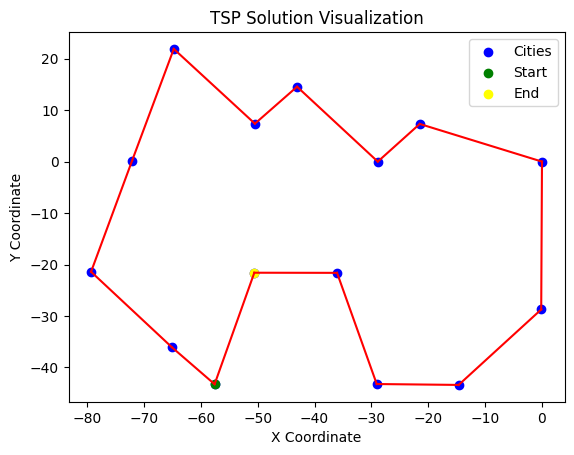

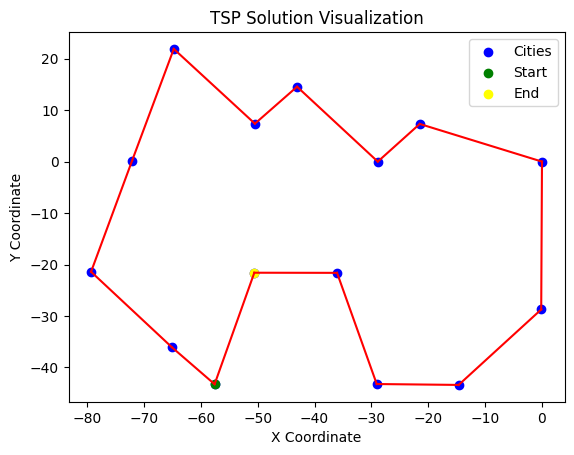

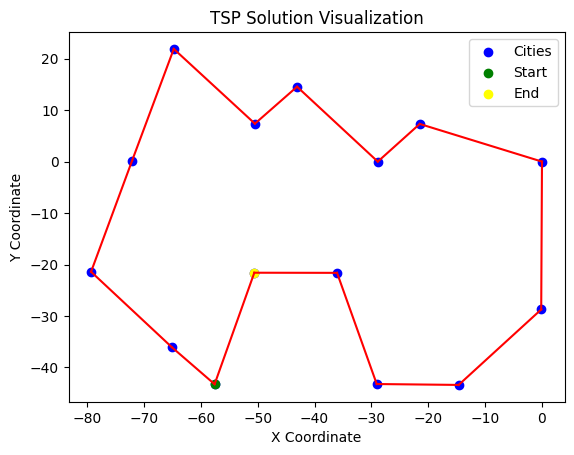

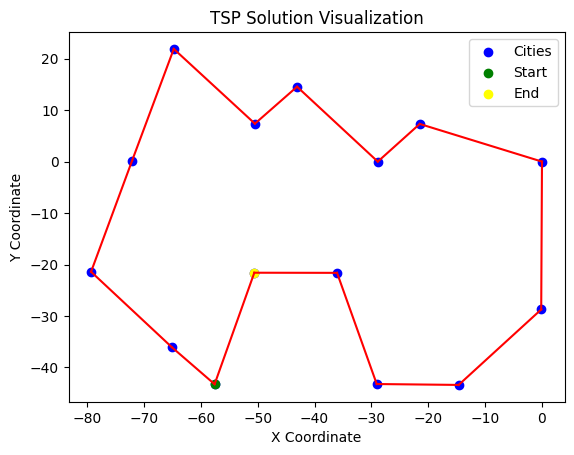

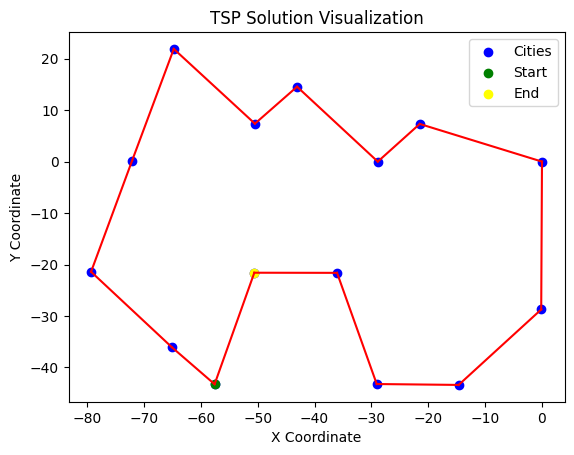

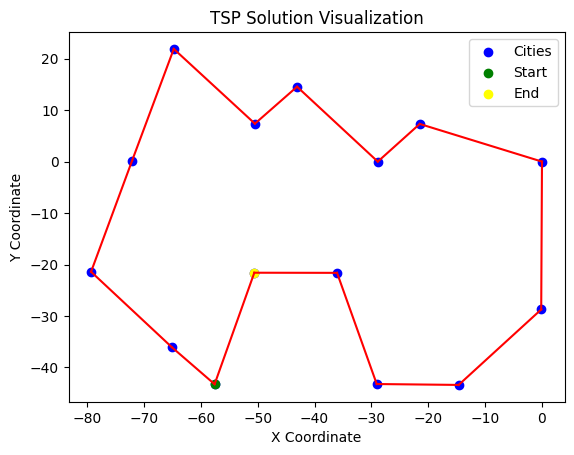

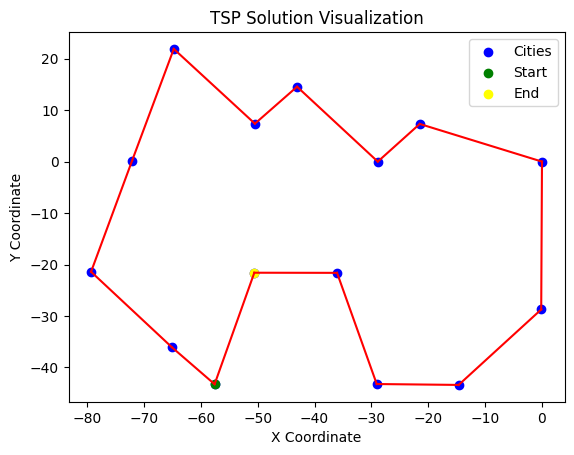

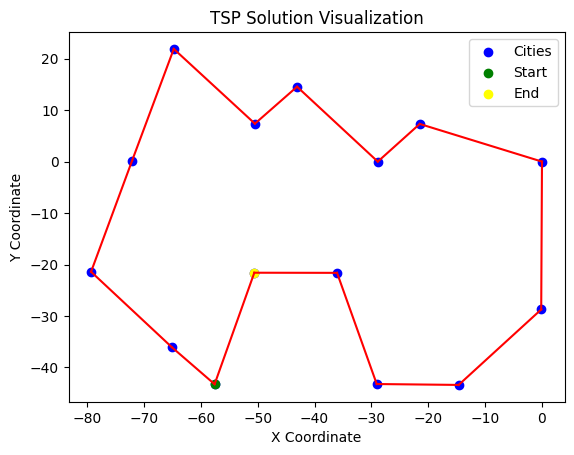

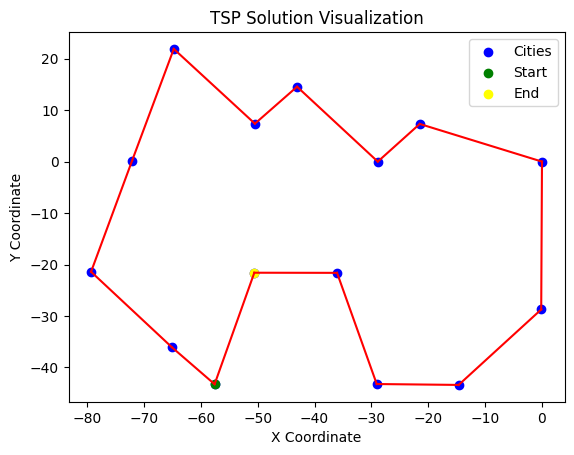

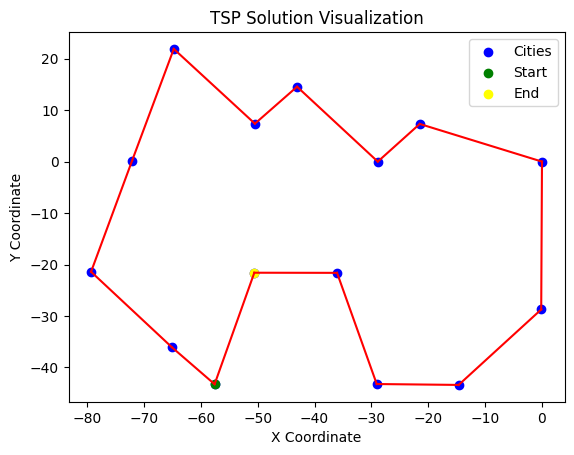

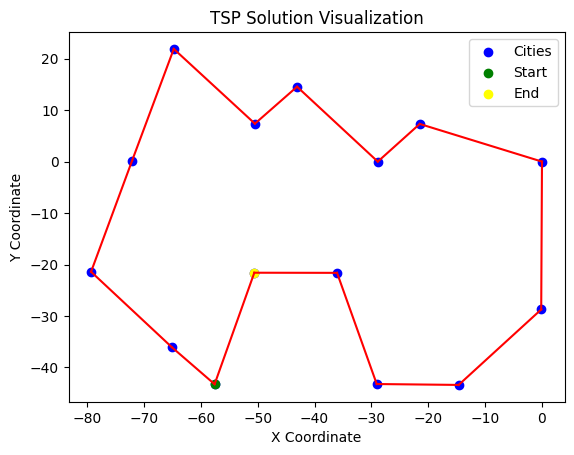

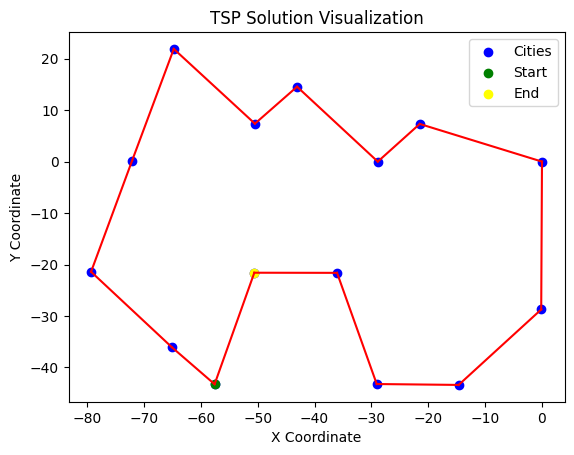

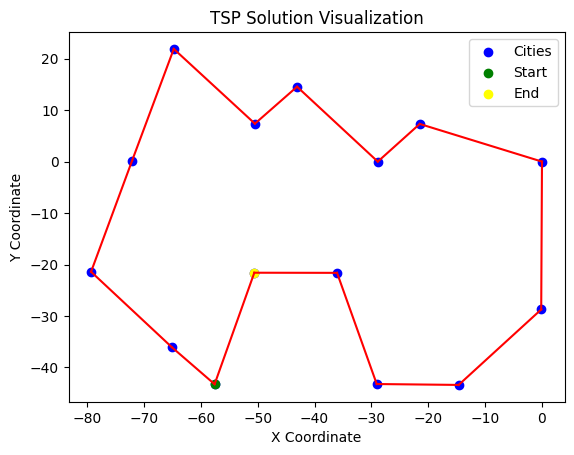

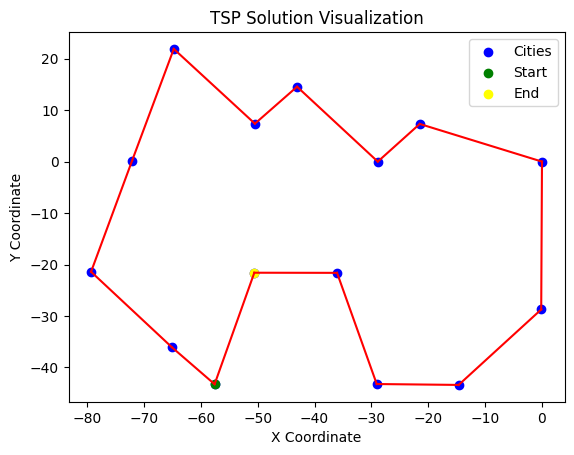

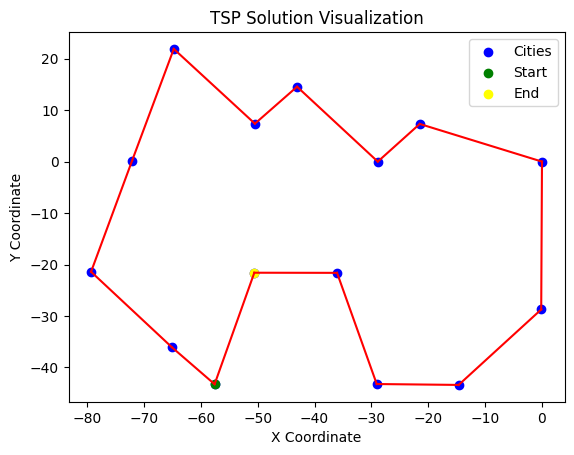

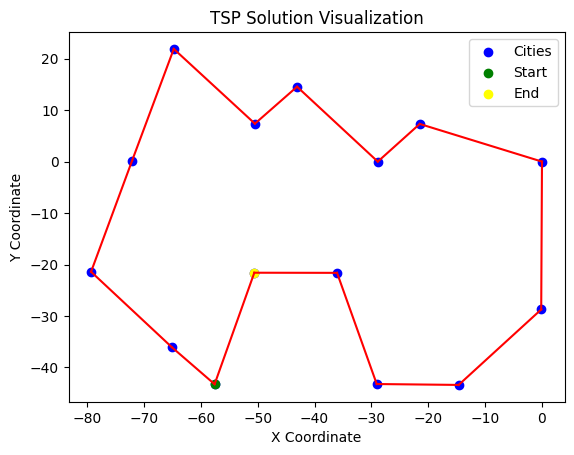

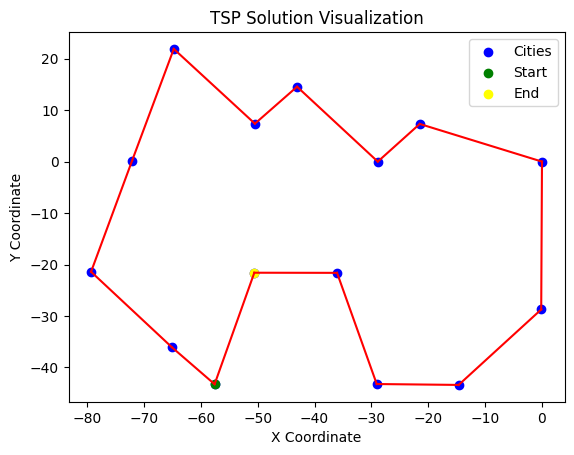

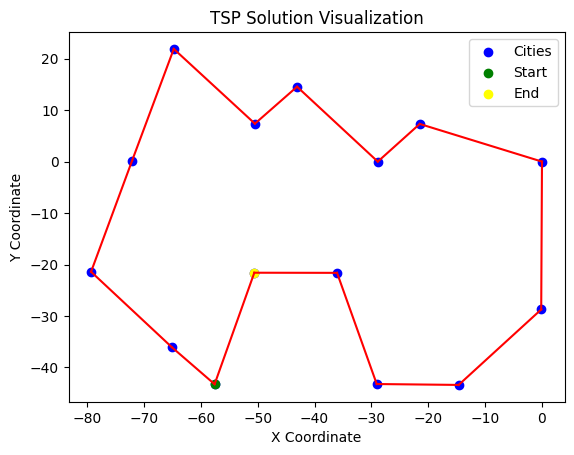

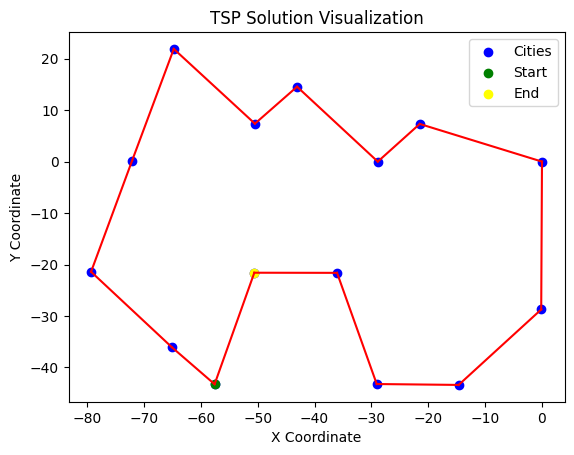

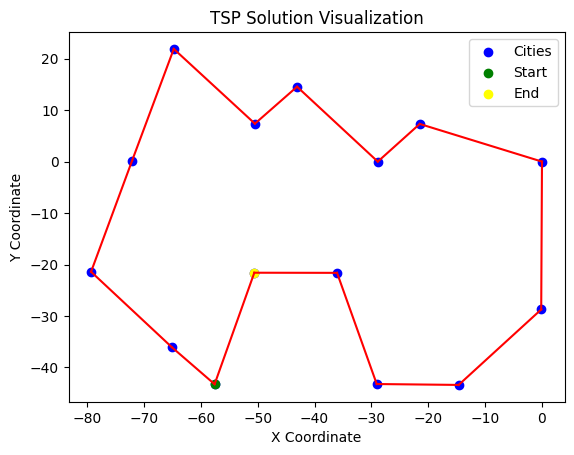

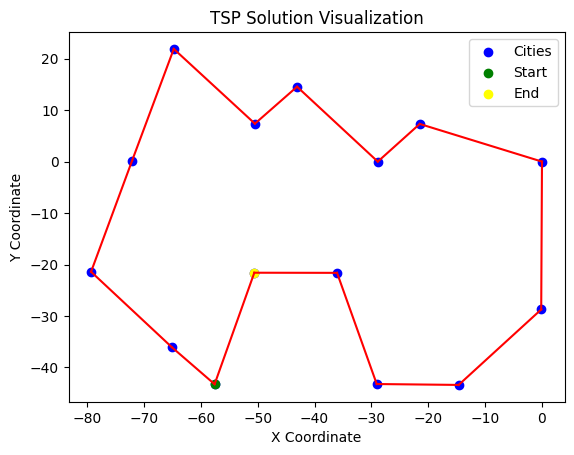

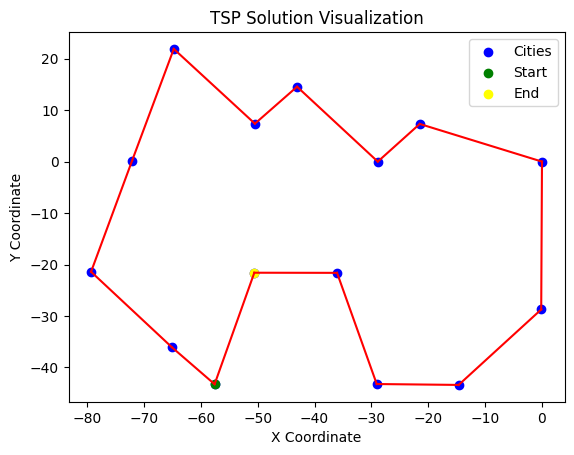

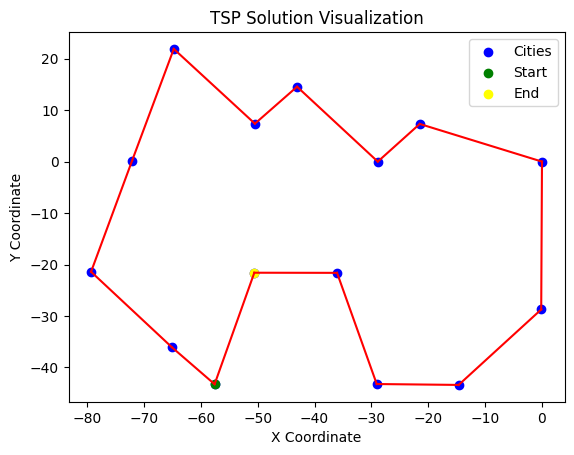

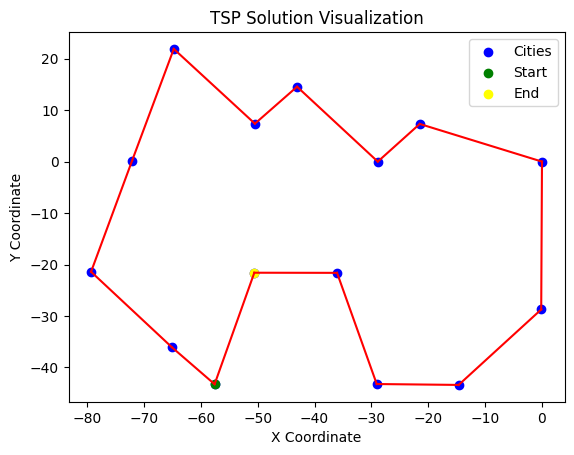

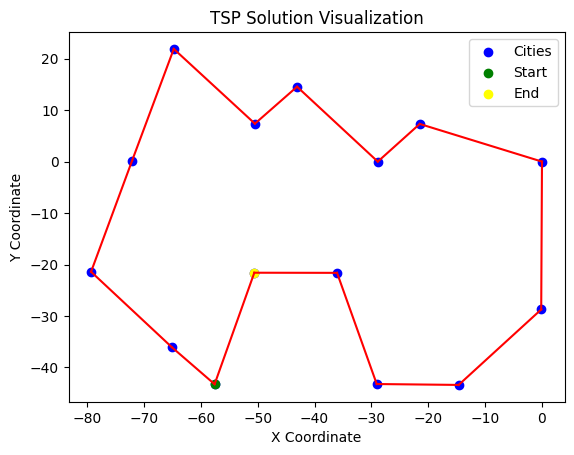

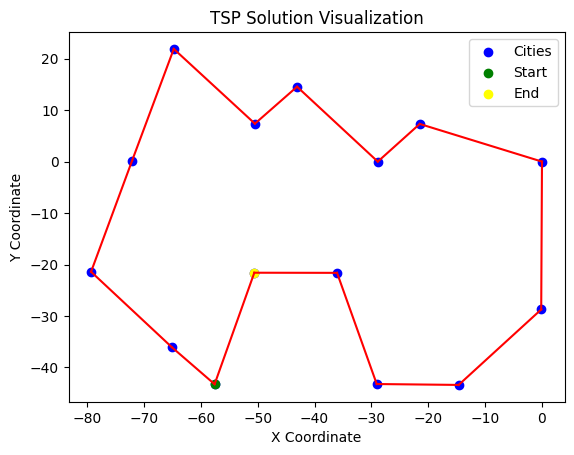

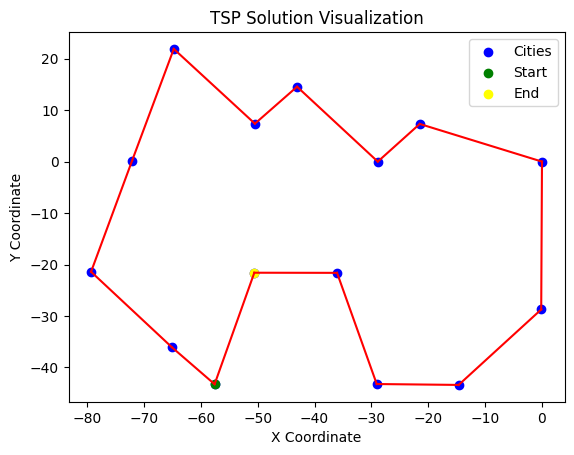

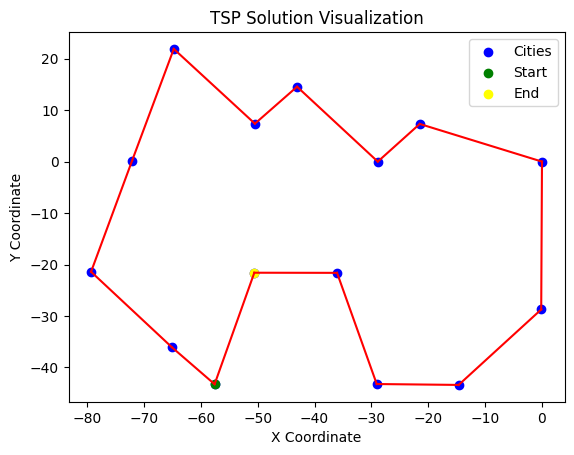

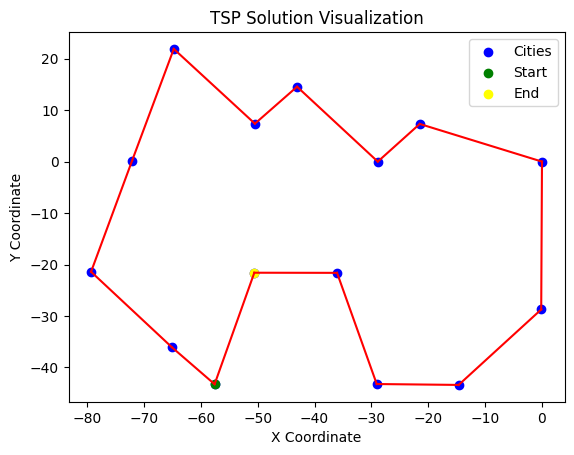

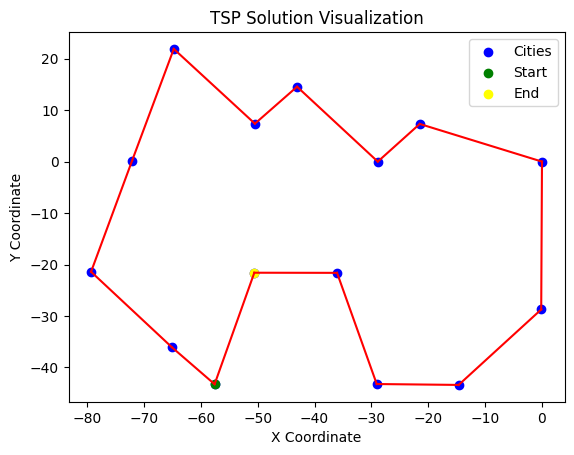

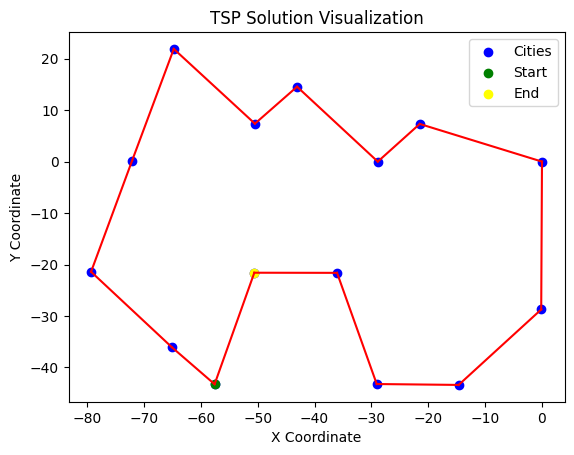

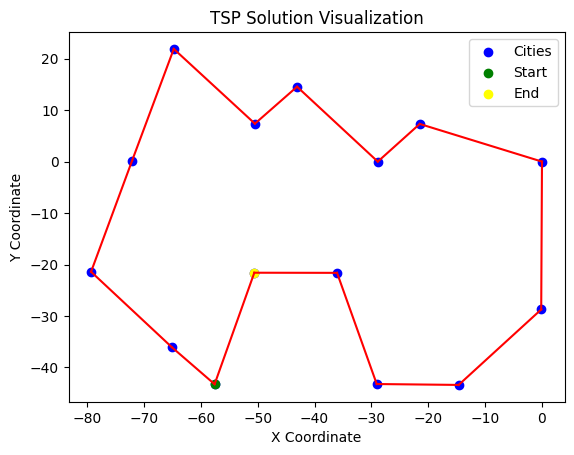

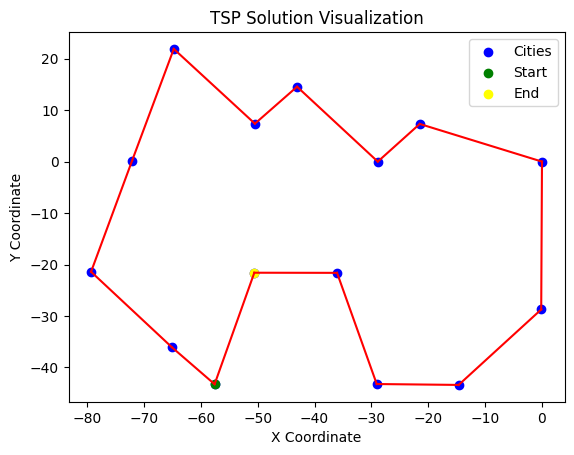

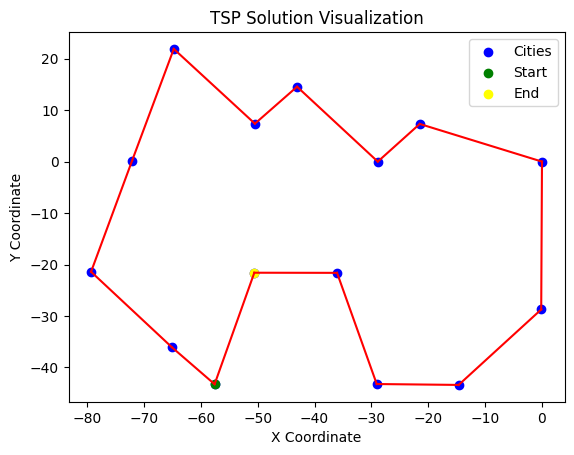

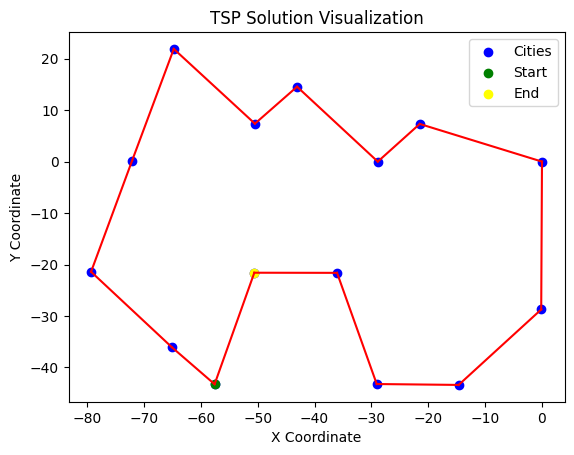

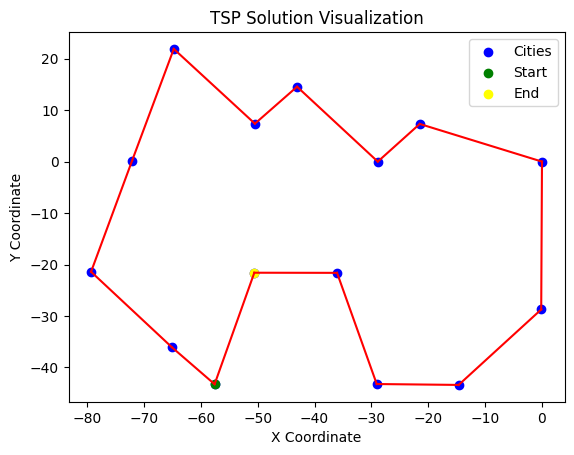

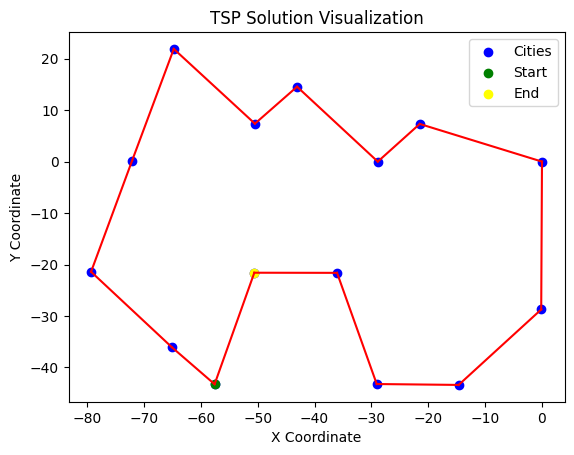

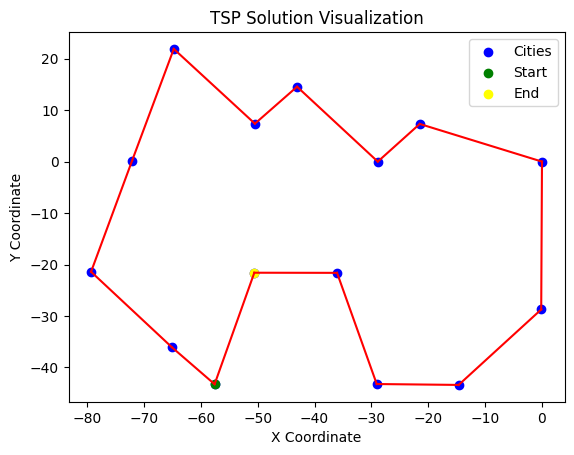

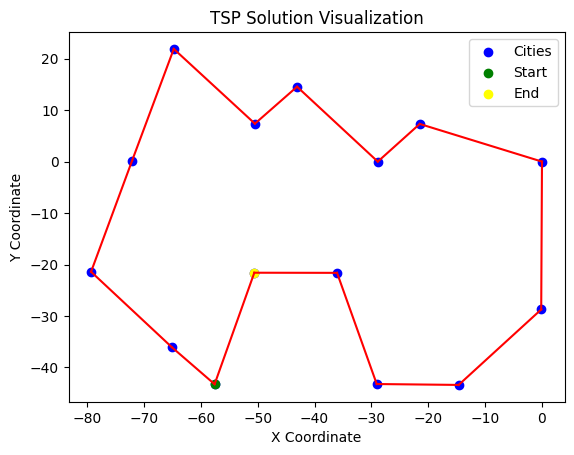

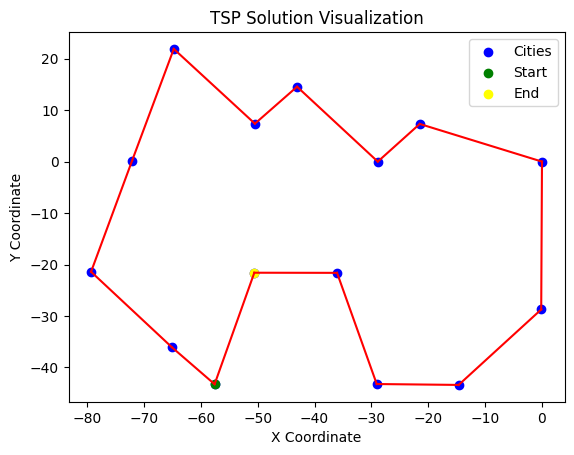

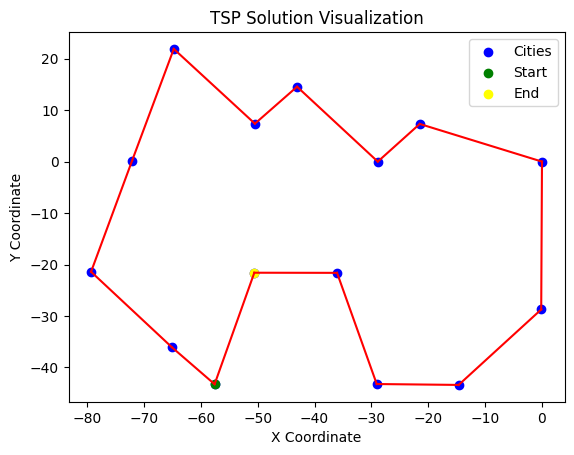

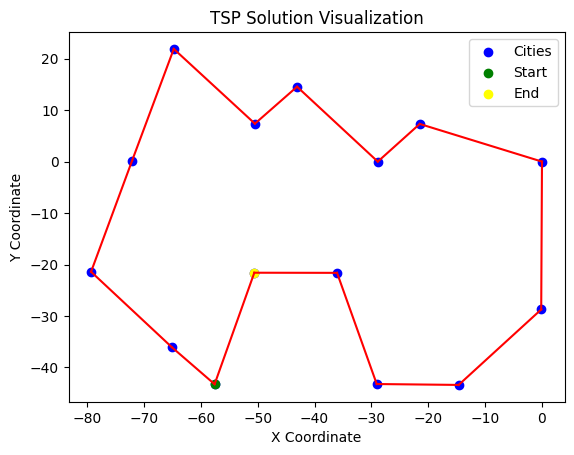

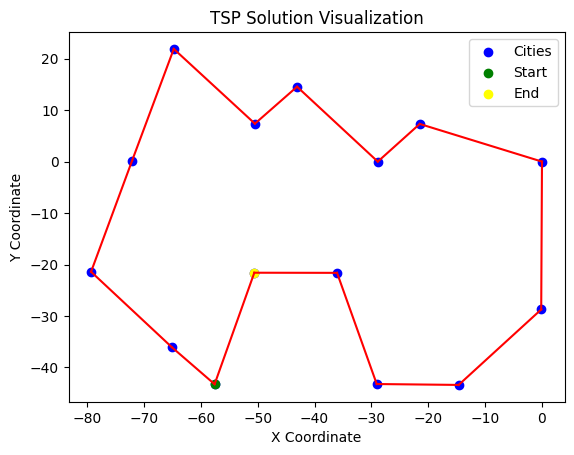

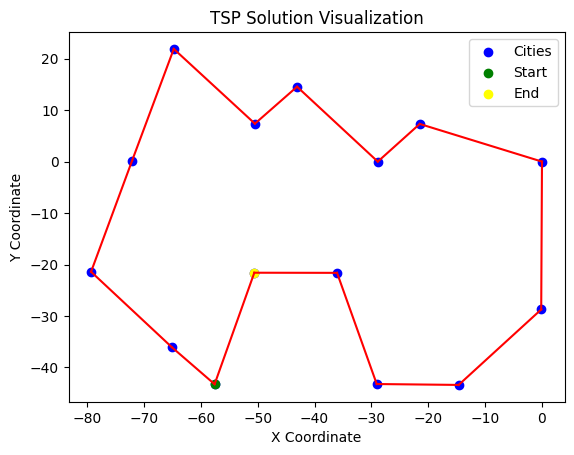

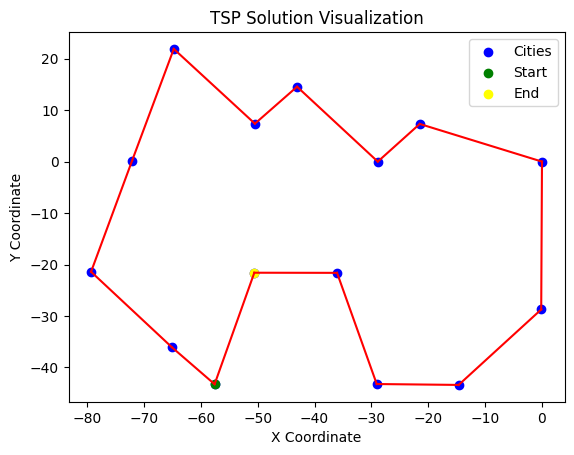

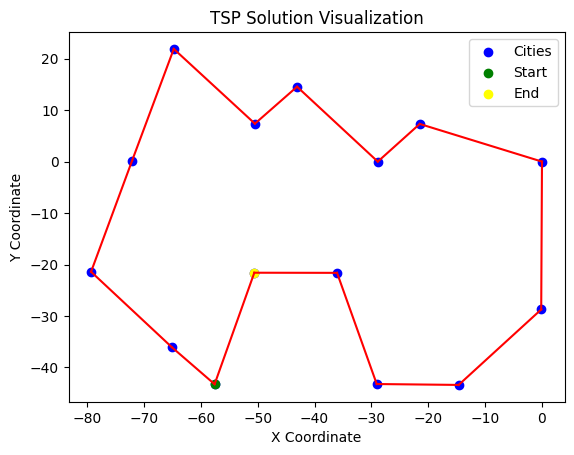

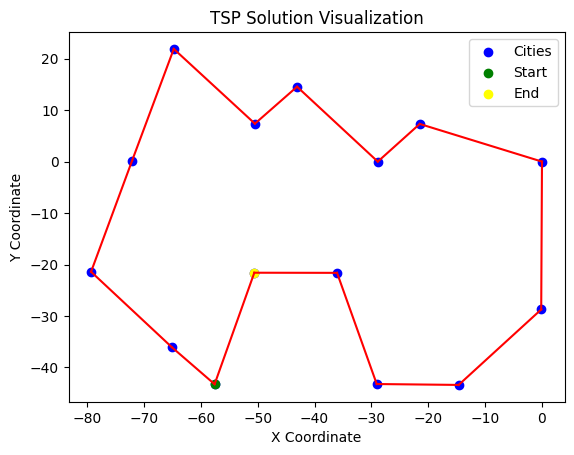

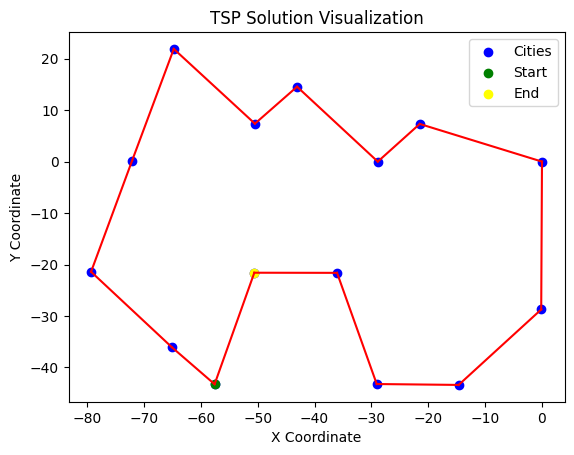

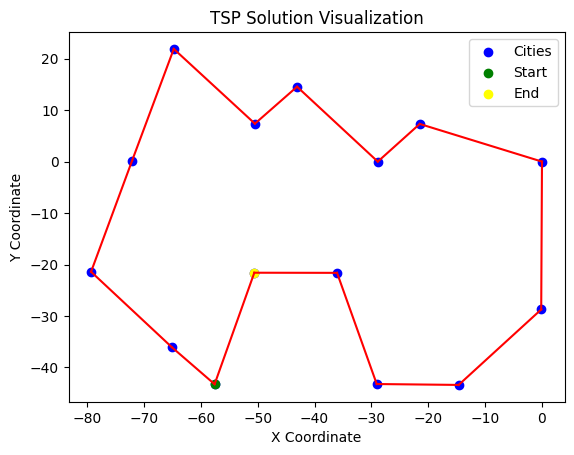

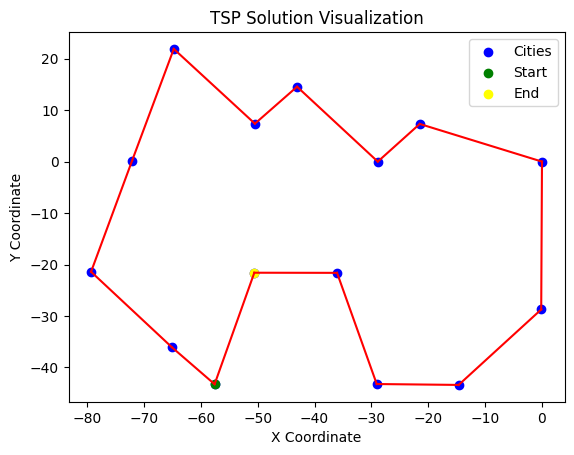

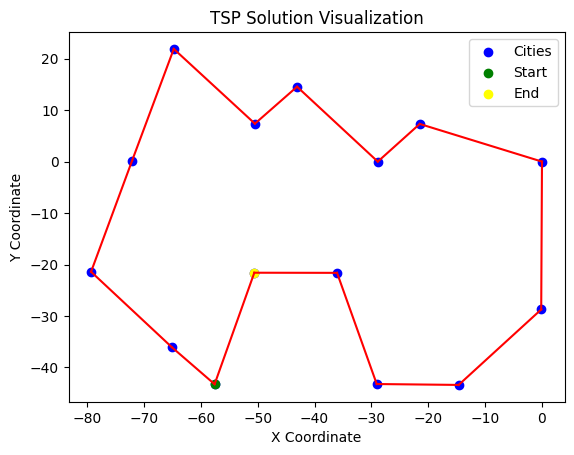

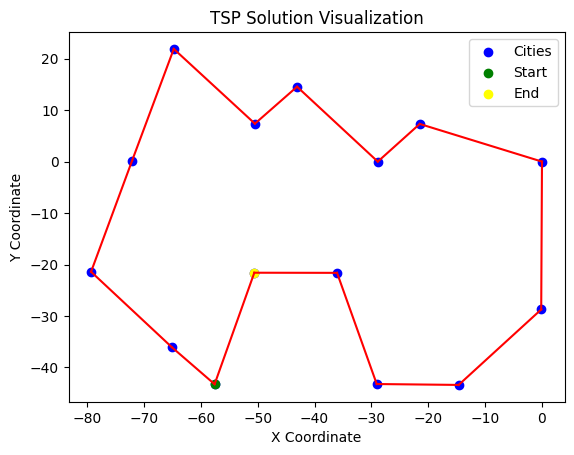

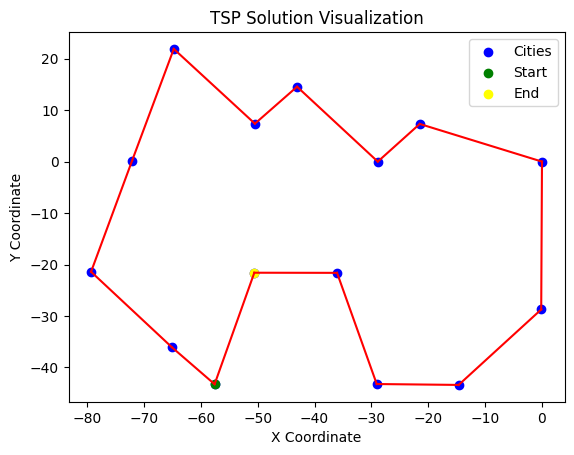

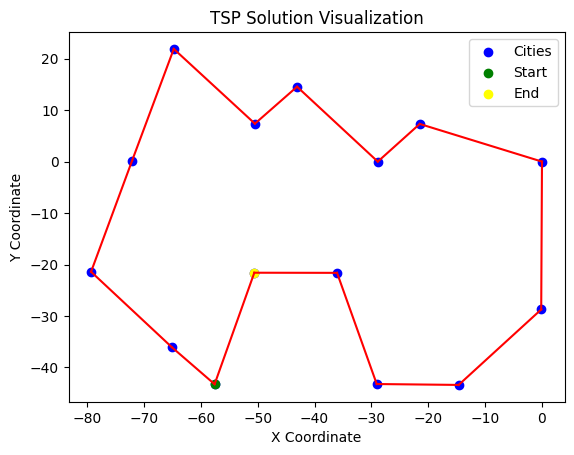

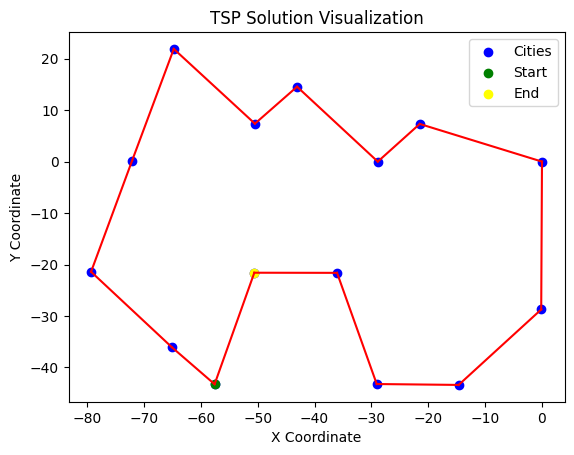

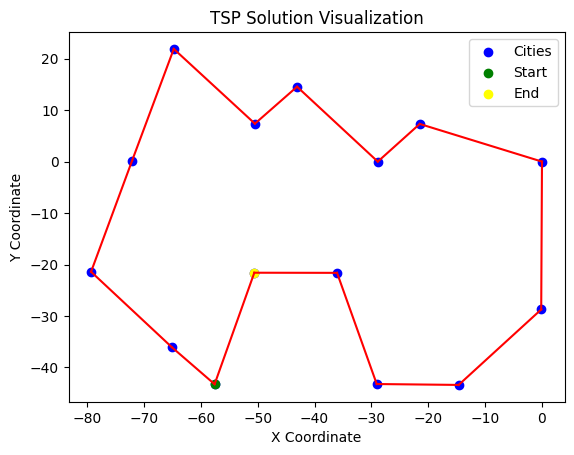

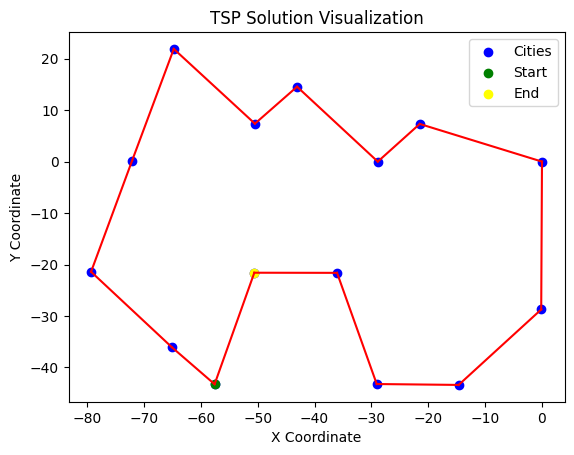

In [13]:
for sol in elites:
    visualize_tsp(sol)